In [1]:
from pororo import Pororo
# 전체 개괄: How to Build an Open-Domain Question Answering System? (https://lilianweng.github.io/posts/2020-10-29-odqa/#open-book-qa-retriever-generator)
# https://github.com/kakaobrain/pororo
# https://kakaobrain.github.io/pororo/seq2seq/qg.html
# https://www.dinolabs.ai/398 : 오픈소스 리뷰기 / 뽀로로
# https://amber-chaeeunk.tistory.com/105 : Generation based mrc


/opt/conda/envs/pororo/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Pororo.available_tasks()

"Available tasks are ['mrc', 'rc', 'qa', 'question_answering', 'machine_reading_comprehension', 'reading_comprehension', 'sentiment', 'sentiment_analysis', 'nli', 'natural_language_inference', 'inference', 'fill', 'fill_in_blank', 'fib', 'para', 'pi', 'cse', 'contextual_subword_embedding', 'similarity', 'sts', 'semantic_textual_similarity', 'sentence_similarity', 'sentvec', 'sentence_embedding', 'sentence_vector', 'se', 'inflection', 'morphological_inflection', 'g2p', 'grapheme_to_phoneme', 'grapheme_to_phoneme_conversion', 'w2v', 'wordvec', 'word2vec', 'word_vector', 'word_embedding', 'tokenize', 'tokenise', 'tokenization', 'tokenisation', 'tok', 'segmentation', 'seg', 'mt', 'machine_translation', 'translation', 'pos', 'tag', 'pos_tagging', 'tagging', 'const', 'constituency', 'constituency_parsing', 'cp', 'pg', 'collocation', 'collocate', 'col', 'word_translation', 'wt', 'summarization', 'summarisation', 'text_summarization', 'text_summarisation', 'summary', 'gec', 'review', 'review_s

In [3]:
# !pip install pandas
# !pip install -U matplotlib
# !pip install seaborn
# !pip3 install datasets

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import seaborn as sns
import re
import json

from collections import Counter
from tqdm import tqdm
from pandas import json_normalize
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import warnings
# 경고메세지 끄기
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist
path = '/usr/share/fonts/nanum/NanumMyeongjoBold.ttf' # fontlist에 있던 경로입니다
font_name = fm.FontProperties(fname=path).get_name()
font_name
plt.rcParams['font.family'] =font_name
plt.rcParams['axes.unicode_minus'] =False

In [6]:
ner = Pororo(task='ner',lang='ko')

# Train DATASET

In [34]:
from datasets import load_from_disk
dataset = load_from_disk("../input/data/train_dataset/")
print(dataset)
df = pd.DataFrame( dataset['train'] )

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})


In [35]:
display(df.head(3))

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,"미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\n\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\n\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05",대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,"'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 1950년대이다. 2차 세계대전을 마치고, 6.25전쟁의 시기로 유럽은 전후 재건에 집중하고, 유럽 제국주의의 식민지가 독립하여 아프리카, 아시아, 아메리카 대륙에서 신생국가가 형성되는 시기였고, 미국은 전쟁 이후 경제적 변화에 기업이 적응을 해야 하던 시기였다. 특히 1954년 피터 드러커의 저서 《경영의 실제》는 현대적 경영의 기준을 제시하여서, 기존 근대적 인사조직관리를 넘어선 현대적 인사조직관리의 전환점이 된다. 드러커는 경영자의 역할을 강조하며 경영이 현시대 최고의 예술이자 과학이라고 주장하였고 , 이 주장은 21세기 인사조직관리의 역할을 자리매김했다.\n\n현대적 인사조직관리와 근대 인사조직관리의 가장 큰 차이는 통합이다. 19세기의 영향을 받던 근대적 경영학(고전적 경영)의 흐름은 기능을 강조하였지만, 1950년대 이후의 현대 경영학은 통합을 강조하였다. 기능이 분화된 '기계적인 기업조직' 이해에서 다양한 기능을 인사조직관리의 목적, 경영의 목적을 위해서 다양한 분야를 통합하여 '유기적 기업 조직' 이해로 전환되었다. 이 통합적 접근방식은 과정, 시스템, 상황을 중심으로 하는 인사조직관리 방식을 형성했다.",현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,"강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전제 독재의 가능성이 보일 수도 있었으나, 스스로 황권을 조절하고 정치의 일부는 재상들이나 대신들과 의논하였으며 당시 궁핍하게 살고 있는 한족들의 사정을 잘 알고 있던 한족 대신들의 의견을 수용하여 정책을 실행하고 선정을 베풀었다. 프랑스의 예수회 선교사 부베는 루이 14세에게 다음과 같이 보고하였다. \n강희제는 세상에서 가장 부유한 군주입니다. 그럼에도 황제인 그의 생활용품들은 사치스러움과 화려함과는 거리가 멀다 못해 소박하기 그지없습니다. 역대 제왕들 가운데 전례없는 일입니다.\n강희제 스스로도 자신이 직접 쓴 《근검록》에서 다음과 같이 쓰고 있다\n모든 비용은 백성들의 피땀으로 얻어진 것이니 주인된 황제로서 절제하고 절제함은 당연한 것이 아닌가\n\n이런 강희제의 인자한 정치는 한족이 만주족의 청나라를 지지하게 만드는 데에 크게 일조하였다. 1717년(강희 56년) 강희제는 〈고별상유〉(告別上諭), 즉 마지막으로 백성들에게 바치는 글을 남겼는데 강희제는 “한 가지 일에 부지런하지 않으면 온 천하에 근심을 끼치고, 한 순간에 부지런하지 않으면 천추만대에 우환거리를 남긴다.”라고 역설하였다. 또한 “제왕이 천하를 다스림에 능력이 있는 자를 가까이 두고, 백성들의 세금을 낮추어 주어야 하며, 백성들의 마음을 하나로 묶고, 위태로움이 생기기 전에 나라를 보호하며, 혼란이 있기 전에 이를 먼저 파악하여 잘 다스리고, 관대하고 엄격함의 조화를 이루어 나라를 위한 계책을 도모해야 한다.”라고 후대의 황제에게도 이를 훈계하였다. 강희제는 황제로서 자식과 같은 백성들에게 이런 당부의 말을 남겨 황제로서의 도리를 다하려 하였다.",강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230


In [36]:
df.iloc[0].context

'미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05'

In [37]:
ner_result = ner(df.iloc[0].context)
# ner_result

NameError: name 'ner' is not defined

관찰 결과 O 지워줘야 할 듯    
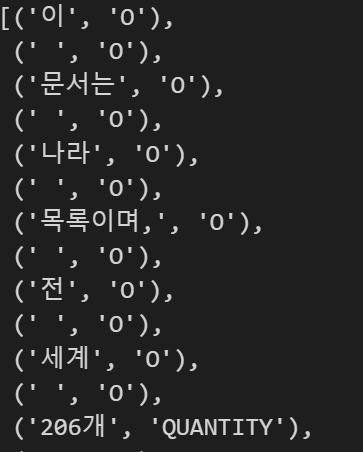{: width="100" height="100"}

In [38]:
ner_result = [(w,ne) for w,ne in ner_result if ne!='O']
set(ner_result)

NameError: name 'ner_result' is not defined

In [39]:
df['answers'].iloc[1]['text'][0]

'《경영의 실제》'

ner 분석 (answer, title)

In [33]:
# 1분 30초 걸림
df_train_ner = df.copy()
# df_train_ner = df_train_ner.head()
df_train_ner['ner_A'] = df_train_ner['answers'].apply(lambda x: [ne for w,ne in ner(x['text'][0]) if ne!='O'])
df_train_ner['ner_T'] = df_train_ner['title'].apply(lambda x: [ne for w,ne in ner(x) if ne!='O'])
df_train_ner.head()

,title,context,question,id,answers,document_id,__index_level_0__,ner_A,ner_T
0,미국 상원,"미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\n\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\n\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05",대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,[ORGANIZATION],"[COUNTRY, ORGANIZATION]"
1,인사조직관리,"'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 1950년대이다. 2차 세계대전을 마치고, 6.25전쟁의 시기로 유럽은 전후 재건에 집중하고, 유럽 제국주의의 식민지가 독립하여 아프리카, 아시아, 아메리카 대륙에서 신생국가가 형성되는 시기였고, 미국은 전쟁 이후 경제적 변화에 기업이 적응을 해야 하던 시기였다. 특히 1954년 피터 드러커의 저서 《경영의 실제》는 현대적 경영의 기준을 제시하여서, 기존 근대적 인사조직관리를 넘어선 현대적 인사조직관리의 전환점이 된다. 드러커는 경영자의 역할을 강조하며 경영이 현시대 최고의 예술이자 과학이라고 주장하였고 , 이 주장은 21세기 인사조직관리의 역할을 자리매김했다.\n\n현대적 인사조직관리와 근대 인사조직관리의 가장 큰 차이는 통합이다. 19세기의 영향을 받던 근대적 경영학(고전적 경영)의 흐름은 기능을 강조하였지만, 1950년대 이후의 현대 경영학은 통합을 강조하였다. 기능이 분화된 '기계적인 기업조직' 이해에서 다양한 기능을 인사조직관리의 목적, 경영의 목적을 위해서 다양한 분야를 통합하여 '유기적 기업 조직' 이해로 전환되었다. 이 통합적 접근방식은 과정, 시스템, 상황을 중심으로 하는 인사조직관리 방식을 형성했다.",현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,[ARTIFACT],[]
2,강희제,"강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전제 독재의 가능성이 보일 수도 있었으나, 스스로 황권을 조절하고 정치의 일부는 재상들이나 대신들과 의논하였으며 당시 궁핍하게 살고 있는 한족들의 사정을 잘 알고 있던 한족 대신들의 의견을 수용하여 정책을 실행하고 선정을 베풀었다. 프랑스의 예수회 선교사 부베는 루이 14세에게 다음과 같이 보고하였다. \n강희제는 세상에서 가장 부유한 군주입니다. 그럼에도 황제인 그의 생활용품들은 사치스러움과 화려함과는 거리가 멀다 못해 소박하기 그지없습니다. 역대 제왕들 가운데 전례없는 일입니다.\n강희제 스스로도 자신이 직접 쓴 《근검록》에서 다음과 같이 쓰고 있다\n모든 비용은 백성들의 피땀으로 얻어진 것이니 주인된 황제로서 절제하고 절제함은 당연한 것이 아닌가\n\n이런 강희제의 인자한 정치는 한족이 만주족의 청나라를 지지하게 만드는 데에 크게 일조하였다. 1717년(강희 56년) 강희제는 〈고별상유〉(告別上諭), 즉 마지막으로 백성들에게 바치는 글을 남겼는데 강희제는 “한 가지 일에 부지런하지 않으면 온 천하에 근심을 끼치고, 한 순간에 부지런하지 않으면 천추만대에 우환거리를 남긴다.”라고 역설하였다. 또한 “제왕이 천하를 다스림에 능력이 있는 자를 가까이 두고, 백성들의 세금을 낮추어 주어야 하며, 백성들의 마음을 하나로 묶고, 위태로움이 생기기 전에 나라를 보호하며, 혼란이 있기 전에 이를 먼저 파악하여 잘 다스리고, 관대하고 엄격함의 조화를 이루어 나라를 위한 계책을 도모해야 한다.”라고 후대의 황제에게도 이를 훈계하였다. 강희제는 황제로서 자식과 같은 백성들에게 이런 당부의 말을 남겨 황제로서의 도리를 다하려 하였다.",강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,[CIVILIZATION],[PERSON]
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든 것을 불감(佛龕)이라고 한다. 불감은 그 안에 모신 불상의 양식뿐만 아니라, 당시의 건축 양식을 함께 살필 수 있는 중요한 자료가 된다. \n\n이 작품은 높이 18cm의 작은 불감으로, 청동으로 불감과 불상을 만들고 그 위에 금칠을 하였다. 불감 내부를 살펴보면 난간을 두른 사각형의 기단 위에 본존불과 양 옆에 보살상이 있으며, 그 위에 기둥과 지붕으로 된 뚜껑이 덮혀 있다. 법당 모양의 뚜껑에는 앞면과 양쪽에 커다란 창문이 있어서 안에 모셔진 불상을 잘 볼 수 있도록 하였다.\n\n본존불은 얼굴이 추상적이고, 양 어깨를 감싸고 있는 옷은 주름을 간략한 선으로 표현했다. 몸 뒤편에 있는 광배(光背)는 머리광배와 몸광배로 나누어져 있으며, 불꽃무늬로 가장자리를 장식하고 있다. 본존불 양 옆의 보살상도 구슬로 장식된 관(冠)을 쓰고 있다는 점을 제외하면 형식이나 표현 수법이 본존불과 유사하다.\n\n불감은 지금도 금색이 찬란하고 지붕에 녹청색이 남아 있는 등 전체적인 보존 상태가 양호하다. 본존불의 긴 허리, 불규칙하게 나타나는 옷주름, 그리고 보살이 쓰고 있는 구슬로 장식한 관(冠) 등 여러 양식으로 보아 만든 시기는 중국 북방 계통의 영향을 받은 11∼12세기 경으로 추정된다. 이 작품은 고려시대 또는 그 이전의 목조건축 양식과 조각수법을 보여주는 귀중한 예라는 점에서 가치가 크다고 할 수 있다.",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,[COUNTRY],[]
4,계사명 사리구,"동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기의 유물로, 경상남도 울주군 웅촌면 대복리에서 출토되었다고 전한다. 외함(外函)은 청화명문이 있는 백자이며, 그 안쪽에 납작한 금속제 원형 합 2점과 금속제 원통형 합 등 3점의 그릇이 봉안되어 있다.\n\n바깥쪽의 외함인 백자 합 동체 중앙부 표면에 청화안료로 쓴 “癸巳二月日 施主承表 兩主”라는 명문이 세로로 세 줄에 걸쳐서 쓰여 있어 조선 후기인 계사년에 시주자인 승표 부부가 발원하여 만든 것임을 알 수 있다.\n\n동아대학교박물관의 계사명 사리구는 정확한 제작연대는 알 수 없지만 명문 등

# Pororo Q-gen

In [11]:
qg = Pororo(task='qg',lang='ko')

In [13]:
ner_result = ner(df.iloc[2].context)
ner_p = [(w,ne) for w,ne in ner_result if ne!='O']
set(ner_p)

{('14세', 'QUANTITY'),
 ('1717년', 'DATE'),
 ('n', 'QUANTITY'),
 ('강희 56년', 'DATE'),
 ('강희제', 'PERSON'),
 ('고별상유', 'ARTIFACT'),
 ('군주', 'OCCUPATION'),
 ('근검록', 'ARTIFACT'),
 ('대신', 'CIVILIZATION'),
 ('루이', 'PERSON'),
 ('만주족', 'CIVILIZATION'),
 ('백성', 'CIVILIZATION'),
 ('부베', 'PERSON'),
 ('선교사', 'OCCUPATION'),
 ('예수회', 'ORGANIZATION'),
 ('자식', 'CIVILIZATION'),
 ('재상', 'CIVILIZATION'),
 ('제왕', 'CIVILIZATION'),
 ('청나라', 'COUNTRY'),
 ('프랑스', 'COUNTRY'),
 ('하나', 'QUANTITY'),
 ('한 가지', 'QUANTITY'),
 ('한족', 'CIVILIZATION'),
 ('황제', 'OCCUPATION')}

## Title로 질문 생성

In [14]:
k = 2
print(df.iloc[k].context)
print(df.iloc[k].title)

강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전제 독재의 가능성이 보일 수도 있었으나, 스스로 황권을 조절하고 정치의 일부는 재상들이나 대신들과 의논하였으며 당시 궁핍하게 살고 있는 한족들의 사정을 잘 알고 있던 한족 대신들의 의견을 수용하여 정책을 실행하고 선정을 베풀었다. 프랑스의 예수회 선교사 부베는 루이 14세에게 다음과 같이 보고하였다. \n강희제는 세상에서 가장 부유한 군주입니다. 그럼에도 황제인 그의 생활용품들은 사치스러움과 화려함과는 거리가 멀다 못해 소박하기 그지없습니다. 역대 제왕들 가운데 전례없는 일입니다.\n강희제 스스로도 자신이 직접 쓴 《근검록》에서 다음과 같이 쓰고 있다\n모든 비용은 백성들의 피땀으로 얻어진 것이니 주인된 황제로서 절제하고 절제함은 당연한 것이 아닌가\n\n이런 강희제의 인자한 정치는 한족이 만주족의 청나라를 지지하게 만드는 데에 크게 일조하였다. 1717년(강희 56년) 강희제는 〈고별상유〉(告別上諭), 즉 마지막으로 백성들에게 바치는 글을 남겼는데 강희제는 “한 가지 일에 부지런하지 않으면 온 천하에 근심을 끼치고, 한 순간에 부지런하지 않으면 천추만대에 우환거리를 남긴다.”라고 역설하였다. 또한 “제왕이 천하를 다스림에 능력이 있는 자를 가까이 두고, 백성들의 세금을 낮추어 주어야 하며, 백성들의 마음을 하나로 묶고, 위태로움이 생기기 전에 나라를 보호하며, 혼란이 있기 전에 이를 먼저 파악하여 잘 다스리고, 관대하고 엄격함의 조화를 이루어 나라를 위한 계책을 도모해야 한다.”라고 후대의 황제에게도 이를 훈계하였다. 강희제는 황제로서 자식과 같은 백성들에게 이런 당부의 말을 남겨 황제로서의 도리를 다하려 하였다.
강희제


In [15]:
qg(
    df.iloc[k].title,
    df.iloc[k].context,
    n_wrong=0
)

'황권을 스스로 조절하고 정치의 일부를 재상들이나 대신들과 의논하여 정책을 실행하고 선정을 베풀었던 인물은?'

In [16]:
qg(
    '부베',
    df.iloc[k].context,
    n_wrong=0
)

'루이 14세에게 강희제에 대해 보고한 사람은?'

In [37]:
# 18.14분 걸림
df_train_ner['Q_based title'] = df_train_ner[['title','context']].apply(lambda x: qg(x[0],x[1],n_wrong=0), axis=1)
df_train_ner.head()

,title,context,question,id,answers,document_id,__index_level_0__,ner_A,ner_T,Q_based title
0,미국 상원,"미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\n\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\n\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05",대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,[ORGANIZATION],"[COUNTRY, ORGANIZATION]",양원제인 미국 의회의 상원의 명칭은?
1,인사조직관리,"'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 1950년대이다. 2차 세계대전을 마치고, 6.25전쟁의 시기로 유럽은 전후 재건에 집중하고, 유럽 제국주의의 식민지가 독립하여 아프리카, 아시아, 아메리카 대륙에서 신생국가가 형성되는 시기였고, 미국은 전쟁 이후 경제적 변화에 기업이 적응을 해야 하던 시기였다. 특히 1954년 피터 드러커의 저서 《경영의 실제》는 현대적 경영의 기준을 제시하여서, 기존 근대적 인사조직관리를 넘어선 현대적 인사조직관리의 전환점이 된다. 드러커는 경영자의 역할을 강조하며 경영이 현시대 최고의 예술이자 과학이라고 주장하였고 , 이 주장은 21세기 인사조직관리의 역할을 자리매김했다.\n\n현대적 인사조직관리와 근대 인사조직관리의 가장 큰 차이는 통합이다. 19세기의 영향을 받던 근대적 경영학(고전적 경영)의 흐름은 기능을 강조하였지만, 1950년대 이후의 현대 경영학은 통합을 강조하였다. 기능이 분화된 '기계적인 기업조직' 이해에서 다양한 기능을 인사조직관리의 목적, 경영의 목적을 위해서 다양한 분야를 통합하여 '유기적 기업 조직' 이해로 전환되었다. 이 통합적 접근방식은 과정, 시스템, 상황을 중심으로 하는 인사조직관리 방식을 형성했다.",현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,[ARTIFACT],[],현대적 인사조직관리의 전환점이 된 것은?
2,강희제,"강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전제 독재의 가능성이 보일 수도 있었으나, 스스로 황권을 조절하고 정치의 일부는 재상들이나 대신들과 의논하였으며 당시 궁핍하게 살고 있는 한족들의 사정을 잘 알고 있던 한족 대신들의 의견을 수용하여 정책을 실행하고 선정을 베풀었다. 프랑스의 예수회 선교사 부베는 루이 14세에게 다음과 같이 보고하였다. \n강희제는 세상에서 가장 부유한 군주입니다. 그럼에도 황제인 그의 생활용품들은 사치스러움과 화려함과는 거리가 멀다 못해 소박하기 그지없습니다. 역대 제왕들 가운데 전례없는 일입니다.\n강희제 스스로도 자신이 직접 쓴 《근검록》에서 다음과 같이 쓰고 있다\n모든 비용은 백성들의 피땀으로 얻어진 것이니 주인된 황제로서 절제하고 절제함은 당연한 것이 아닌가\n\n이런 강희제의 인자한 정치는 한족이 만주족의 청나라를 지지하게 만드는 데에 크게 일조하였다. 1717년(강희 56년) 강희제는 〈고별상유〉(告別上諭), 즉 마지막으로 백성들에게 바치는 글을 남겼는데 강희제는 “한 가지 일에 부지런하지 않으면 온 천하에 근심을 끼치고, 한 순간에 부지런하지 않으면 천추만대에 우환거리를 남긴다.”라고 역설하였다. 또한 “제왕이 천하를 다스림에 능력이 있는 자를 가까이 두고, 백성들의 세금을 낮추어 주어야 하며, 백성들의 마음을 하나로 묶고, 위태로움이 생기기 전에 나라를 보호하며, 혼란이 있기 전에 이를 먼저 파악하여 잘 다스리고, 관대하고 엄격함의 조화를 이루어 나라를 위한 계책을 도모해야 한다.”라고 후대의 황제에게도 이를 훈계하였다. 강희제는 황제로서 자식과 같은 백성들에게 이런 당부의 말을 남겨 황제로서의 도리를 다하려 하였다.",강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,[CIVILIZATION],[PERSON],황권을 스스로 조절하고 정치의 일부를 재상들이나 대신들과 의논하여 정책을 실행하고 선정을 베풀었던 인물은?
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든 것을 불감(佛龕)이라고 한다. 불감은 그 안에 모신 불상의 양식뿐만 아니라, 당시의 건축 양식을 함께 살필 수 있는 중요한 자료가 된다. \n\n이 작품은 높이 18cm의 작은 불감으로, 청동으로 불감과 불상을 만들고 그 위에 금칠을 하였다. 불감 내부를 살펴보면 난간을 두른 사각형의 기단 위에 본존불과 양 옆에 보살상이 있으며, 그 위에 기둥과 지붕으로 된 뚜껑이 덮혀 있다. 법당 모양의 뚜껑에는 앞면과 양쪽에 커다란 창문이 있어서 안에 모셔진 불상을 잘 볼 수 있도록 하였다.\n\n본존불은 얼굴이 추상적이고, 양 어깨를 감싸고 있는 옷은 주름을 간략한 선으로 표현했다. 몸 뒤편에 있는 광배(光背)는 머리광배와 몸광배로 나누어져 있으며, 불꽃무늬로 가장자리를 장식하고 있다. 본존불 양 옆의 보살상도 구슬로 장식된 관(冠)을 쓰고 있다는 점을 제외하면 형식이나 표현 수법이 본존불과 유사하다.\n\n불감은 지금도 금색이 찬란하고 지붕에 녹청색이 남아 있는 등 전체적인 보존 상태가 양호하다. 본존불의 긴 허리, 불규칙하게 나타나는 옷주름, 그리고 보살이 쓰고 있는 구슬로 장식한 관(冠) 등 여러 양식으로 보아 만든 시기는 중국 북방 계통의 영향을 받은 11∼12세기 경으로 추정된다. 이 작품은 고려시대 또는 그 이전의 목조건축 양식과 조각수법을 보여주는 귀중한 예라는 점에서 가치가 크다고 할 수 있다.",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,[COUNTRY],[],불감이 뭐야?
4,계사명 사리구,"동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기의 유물로, 경상남도 울주군 웅촌면 대복리에서 출토되었다고 전한다. 외함(外函)은 청화명문이 있는 백자이며, 그 안쪽에 납작한 금속제 원형 합 2점과 금속제 원통형 합 등 3점의 그릇이 봉안되어 있다.\n\n바깥쪽의 외함인 백자 합 동체 중앙부 표면에 청화안료로 쓴 “癸巳

In [42]:
df_train_ner.to_csv('/opt/ml/input/data/train_dataset/train_QG.csv', sep=',', na_rep='NaN') # do not write index

In [38]:
# df_tmp = df_train_ner.head()
# df_tmp.to_csv('/opt/ml/input/data/train_dataset/train_QG.csv', sep=',', na_rep='NaN',index=False) # do not write index
# df_tmp = pd.read_csv('/opt/ml/input/data/train_dataset/train_QG.csv')
# display(df_tmp)

,title,context,question,id,answers,document_id,__index_level_0__,ner_A,ner_T,Q_based title
0,미국 상원,"미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\n\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\n\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05",대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,['ORGANIZATION'],"['COUNTRY', 'ORGANIZATION']",양원제인 미국 의회의 상원의 명칭은?
1,인사조직관리,"'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 1950년대이다. 2차 세계대전을 마치고, 6.25전쟁의 시기로 유럽은 전후 재건에 집중하고, 유럽 제국주의의 식민지가 독립하여 아프리카, 아시아, 아메리카 대륙에서 신생국가가 형성되는 시기였고, 미국은 전쟁 이후 경제적 변화에 기업이 적응을 해야 하던 시기였다. 특히 1954년 피터 드러커의 저서 《경영의 실제》는 현대적 경영의 기준을 제시하여서, 기존 근대적 인사조직관리를 넘어선 현대적 인사조직관리의 전환점이 된다. 드러커는 경영자의 역할을 강조하며 경영이 현시대 최고의 예술이자 과학이라고 주장하였고 , 이 주장은 21세기 인사조직관리의 역할을 자리매김했다.\n\n현대적 인사조직관리와 근대 인사조직관리의 가장 큰 차이는 통합이다. 19세기의 영향을 받던 근대적 경영학(고전적 경영)의 흐름은 기능을 강조하였지만, 1950년대 이후의 현대 경영학은 통합을 강조하였다. 기능이 분화된 '기계적인 기업조직' 이해에서 다양한 기능을 인사조직관리의 목적, 경영의 목적을 위해서 다양한 분야를 통합하여 '유기적 기업 조직' 이해로 전환되었다. 이 통합적 접근방식은 과정, 시스템, 상황을 중심으로 하는 인사조직관리 방식을 형성했다.",현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,['ARTIFACT'],[],현대적 인사조직관리의 전환점이 된 것은?
2,강희제,"강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전제 독재의 가능성이 보일 수도 있었으나, 스스로 황권을 조절하고 정치의 일부는 재상들이나 대신들과 의논하였으며 당시 궁핍하게 살고 있는 한족들의 사정을 잘 알고 있던 한족 대신들의 의견을 수용하여 정책을 실행하고 선정을 베풀었다. 프랑스의 예수회 선교사 부베는 루이 14세에게 다음과 같이 보고하였다. \n강희제는 세상에서 가장 부유한 군주입니다. 그럼에도 황제인 그의 생활용품들은 사치스러움과 화려함과는 거리가 멀다 못해 소박하기 그지없습니다. 역대 제왕들 가운데 전례없는 일입니다.\n강희제 스스로도 자신이 직접 쓴 《근검록》에서 다음과 같이 쓰고 있다\n모든 비용은 백성들의 피땀으로 얻어진 것이니 주인된 황제로서 절제하고 절제함은 당연한 것이 아닌가\n\n이런 강희제의 인자한 정치는 한족이 만주족의 청나라를 지지하게 만드는 데에 크게 일조하였다. 1717년(강희 56년) 강희제는 〈고별상유〉(告別上諭), 즉 마지막으로 백성들에게 바치는 글을 남겼는데 강희제는 “한 가지 일에 부지런하지 않으면 온 천하에 근심을 끼치고, 한 순간에 부지런하지 않으면 천추만대에 우환거리를 남긴다.”라고 역설하였다. 또한 “제왕이 천하를 다스림에 능력이 있는 자를 가까이 두고, 백성들의 세금을 낮추어 주어야 하며, 백성들의 마음을 하나로 묶고, 위태로움이 생기기 전에 나라를 보호하며, 혼란이 있기 전에 이를 먼저 파악하여 잘 다스리고, 관대하고 엄격함의 조화를 이루어 나라를 위한 계책을 도모해야 한다.”라고 후대의 황제에게도 이를 훈계하였다. 강희제는 황제로서 자식과 같은 백성들에게 이런 당부의 말을 남겨 황제로서의 도리를 다하려 하였다.",강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,['CIVILIZATION'],['PERSON'],황권을 스스로 조절하고 정치의 일부를 재상들이나 대신들과 의논하여 정책을 실행하고 선정을 베풀었던 인물은?
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든 것을 불감(佛龕)이라고 한다. 불감은 그 안에 모신 불상의 양식뿐만 아니라, 당시의 건축 양식을 함께 살필 수 있는 중요한 자료가 된다. \n\n이 작품은 높이 18cm의 작은 불감으로, 청동으로 불감과 불상을 만들고 그 위에 금칠을 하였다. 불감 내부를 살펴보면 난간을 두른 사각형의 기단 위에 본존불과 양 옆에 보살상이 있으며, 그 위에 기둥과 지붕으로 된 뚜껑이 덮혀 있다. 법당 모양의 뚜껑에는 앞면과 양쪽에 커다란 창문이 있어서 안에 모셔진 불상을 잘 볼 수 있도록 하였다.\n\n본존불은 얼굴이 추상적이고, 양 어깨를 감싸고 있는 옷은 주름을 간략한 선으로 표현했다. 몸 뒤편에 있는 광배(光背)는 머리광배와 몸광배로 나누어져 있으며, 불꽃무늬로 가장자리를 장식하고 있다. 본존불 양 옆의 보살상도 구슬로 장식된 관(冠)을 쓰고 있다는 점을 제외하면 형식이나 표현 수법이 본존불과 유사하다.\n\n불감은 지금도 금색이 찬란하고 지붕에 녹청색이 남아 있는 등 전체적인 보존 상태가 양호하다. 본존불의 긴 허리, 불규칙하게 나타나는 옷주름, 그리고 보살이 쓰고 있는 구슬로 장식한 관(冠) 등 여러 양식으로 보아 만든 시기는 중국 북방 계통의 영향을 받은 11∼12세기 경으로 추정된다. 이 작품은 고려시대 또는 그 이전의 목조건축 양식과 조각수법을 보여주는 귀중한 예라는 점에서 가치가 크다고 할 수 있다.",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,['COUNTRY'],[],불감이 뭐야?
4,계사명 사리구,"동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기의 유물로, 경상남도 울주군 웅촌면 대복리에서 출토되었다고 전한다. 외함(外函)은 청화명문이 있는 백자이며, 그 안쪽에 납작한 금속제 원형 합 2점과 금속제 원통형 합 등 3점의 그릇이 봉안되어 있다.\n\n바깥쪽의 외함인 백자 합 동체 중앙부 표

## Entity로 질문 생성

In [17]:
ner_result = ner(df.iloc[k].context)
ner_p = [(w,ne) for w,ne in ner_result if ne=='PERSON']
set(ner_p)

{('강희제', 'PERSON'), ('루이', 'PERSON'), ('부베', 'PERSON')}

In [18]:
for w,p in set(ner_p):
    result = qg(
        w,
        df.iloc[k].context,
        n_wrong=0
    )
    print(result,w)
    # print(f'생성된 질문: {result[0]}, 반환된 오답: {result[1]}')

프랑스의 예수회 선교사 부베는 누구에게 강희제에 대해 보고했는가? 루이
황권을 스스로 조절하고 정치의 일부를 재상들이나 대신들과 의논하여 정책을 실행하고 선정을 베풀었던 인물은? 강희제
루이 14세에게 강희제에 대해 보고한 사람은? 부베


In [21]:
ner_c = [(w,ne) for w,ne in ner_result if ne=='COUNTRY']
print(set(ner_c))
for w,p in set(ner_c):
    result = qg(
        w,
        df.iloc[k].context,
        n_wrong=0
    )
    print('gen_Q: ',result,'\nA: ',w)
    # print(f'생성된 질문: {result[0]}, 반환된 오답: {result[1]}')


{('청나라', 'COUNTRY'), ('프랑스', 'COUNTRY')}
gen_Q:  강희제의 인자한 정치는 한족이 만주족의 어느 나라를 지지하게 만드는데 크게 일조하였나? 
A:  청나라
gen_Q:  예수회 선교사 부베는 어느나라 사람인가? 
A:  프랑스


# wiki title based QG

In [40]:
# with open('../input/data/wikipedia_documents.json') as f:
#     js = json.loads(f.read()) ## json 라이브러리 이용
# df = pd.DataFrame(js)
df = pd.read_json('../input/data/wikipedia_documents.json') ## pd.read_json 이용
df = df.transpose()
display(df.head(2))

KeyboardInterrupt: 

In [ ]:
len(df)

60613

In [ ]:
df_wiki_ner = df.copy()
# df_wiki_ner = df_wiki_ner.head()

In [ ]:
df_wiki_ner['Q_based title'] = df_wiki_ner[['title','text']].apply(lambda x: qg(x[0],x[1],n_wrong=0), axis=1)

In [ ]:
df_wiki_ner.to_csv('/opt/ml/input/data/train_dataset/wiki_QG.csv', sep=',', na_rep='NaN') # do not write index

In [ ]:
df_wiki_ner.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [47]:
df_wiki_QG = pd.read_csv('/opt/ml/input/data/wiki_QG_concat.csv')

In [144]:
len(df_wiki_QG)

5

In [145]:
df_wiki_QG.head(10)

title  \
0    나라 목록   
1   데니스 리치   
2      백남준   
3  아오조라 문고   
4     주기율표   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [48]:
df_test = df_wiki_QG.head(10).copy()

df_test = df_test.groupby('title').agg({'text': lambda x: ' '.join(map(str,x)), 'corpus_source':'first', 'url':'first', 'domain':'first',  'author':'first', 'html':'first', 'document_id':'first', 'Q_based title':lambda x: list(map(str,x))
                                        }).reset_index()   
# df_test = df_test.groupby('title').agg({'text': lambda x: ' '.join(map(str,x)), 'corpus_source':'first', 'url':'first', 'domain':'first',  'author':'first', 'html':'first', 'document_id':'first', 'Q_based title':lambda x: x.iloc[:].to_list() }).reset_index()  # 동일한 코드임
# df_test
df_test.iloc[3]['Q_based title']

["Bill Bailey, Won't You Please... Come Home?라는 곡의 원제가 뭐야?"]

질문에 대해서 여러개가 만들어지네? 하다가 알고 보니 text를 concat한 뒤에 해야 한다는 사실을 깨달아 다시 수행한다.

## text concat 후 title에 대한 Q G 수행

30개에 대해서 수행

In [49]:
df_test = df.head(30).copy()
df_test = df_test.groupby('title').agg({'text': lambda x: ' '.join(map(str,x)), 'corpus_source':'first', 'url':'first', 'domain':'first',  'author':'first', 'html':'first', 'document_id':lambda x:list(map(int,x))}).reset_index() 
df_test

KeyError: 'title'

In [165]:
df_test['Q_based title'] = df_test[['title','text']].apply(lambda x: qg(x[0],x[1],n_wrong=0), axis=1)
df_test

title  \
0          나라 목록   
1            대수학   
2         데니스 리치   
3            백남준   
4           삼각함수   
5           아미노산   
6        아오조라 문고   
7   자연철학의 수학적 원리   
8           주기율표   
9            통계학   
10         파이의 날   
11         표준 모형   
12        푸리에 급수   
13          히라가나   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

전체에 대해서 수행

In [50]:
df_test = df.copy()
df_test = df_test.groupby('title').agg({'text': lambda x: ' '.join(map(str,x)), 'corpus_source':'first', 'url':'first', 'domain':'first',  'author':'first', 'html':'first', 'document_id':lambda x:list(map(int,x))}).reset_index() 
len(df_test)

KeyError: 'title'

In [51]:
df_test[df_test['title']=='아오조라 문고']

KeyError: 'title'

확인만 하고, 수행은 .py파일로 돌림. 아래는 예상 소요시간

In [163]:
print(f'총 {len(df_test)*2.1/5/60/60} 시간 걸릴 듯')

총 3.7047499999999998 시간 걸릴 듯


## start index 찾기

In [54]:
df_wiki_QG = pd.read_csv('/opt/ml/input/data/wiki_QG_concat.csv')
print(len(df_wiki_QG))
df_wiki = pd.read_json('../input/data/wikipedia_documents.json') ## pd.read_json 이용
df_wiki = df_wiki.transpose()
print(len(df_wiki))

31755
60613


In [55]:
display(df_wiki_QG.head(2))
display(df_wiki.head(2))

,title,text,corpus_source,url,domain,author,html,document_id,Q_based title
0,!쿵어,"ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로 다르고, 시간이 지나면서 새로운 분류체계가 등장하고 있어 같은 용어라도 다른 의미로 쓰이는 경우가 있다. \nǃ쿵어(ǃKung)라는 이름은 서로 연관되어있는 방언 각각 이름에 주로 사용하며(예:북부 ǃ쿵어, 중부 ǃ쿵어), 때로는 더 넓은 의미로 방언연속체를 구성하는 언어들 중 북부/북서부 지역의 방언들을 일컫는 말이다. 이때 대응되는 개념은 주호안어(Ju|ʼhoan)이며, 전체 중 남부/남동부의 방언을 지칭한다.\n주어(Ju)라는 이름은 다양한 ǃ쿵어의 방언들을 하나의 “작은 어족”(language complex)으로 묶어서 부를 경우 주로 사용된다(예: 카어족은 주어(Ju)와 ǂʼ암코이어(ǂʼAmkoe)로 구성된다). \n유전자 기반의 분석을 진행하는 분자인류학자들은 북부 ǃ쿵어를 사용하는 사람들을 세켈레(Sekele) 또는 바시켈라 ǃ쿵(Vasikela ǃKung)으로 표기하였고, 남부 ǃ쿵어, 즉 주호안어(Ju|ʼhoan)을 사용하는 사람들을 춤쿠에 산(Tsumkwe San) 혹은 ǃ쿵(ǃKung)으로 분류하였다. \n\nǃ쿵(ǃKung)이라는 단어 역시 다양한 형태로 표현된다. ǃ쿵(ǃKung)이 처음으로 사용된 것은 1937년이었다. \nǃ쿵(ǃKung)을 나타내기 위하여 ǃXun ,\nǃXuun , ǃXʼu(u)n, ǃKu(u)n, ǃHu, ǃKhung, ǃKu, Kung, Qxü, ǃung, ǃXo, ǃXu ,\nXû, ǃXû, Xun, ǃXung ,\nǃXũ ,\nǃXũũ, ʗhũ: \n등 다양한 표기가 사용되었다. 주(Ju) 역시 Dzu , Juu , Zhu 등 다양한 형태로 표기되었다.\n\n최근 문헌의 경우 ǃ쿵어를 표기하기 위해 ǃXun 또는 ǃXuun을 사용하는 경우가 많다. 다양한 ǃ쿵어들을 묶은 주어(Ju)는 흡착음을 사용하는 언어 중 코이코이어(Khoekhoe, ), 산다웨어(Sandawe, )에 이어 세 번째로 많은 사용자 수를 지닌다. 총 15,000명의 사용자가 있을 것으로 추정되며, 각각 나미비아에 9,000명, 보츠와나에 2,000명, 앙골라에 1,000명, 남아공에 3,700명의 사용자가 있을 것으로 추정된다. 앙골라의 ǃ쿵어 사용자 수는 1975년의 8,000명에서 앙골라 내전을 거친 현재 크게 줄어든 상태이다. 북부 ǃ쿵어를 사용하는 사람들이 앙골라 내전을 피하기 위해 나미비아로 탈출하거나, 남아공의 남아프리카 연방군에 소속되어 남아프리카 국경 전쟁에 투입되었다. 지속되는 남아프리카 국경 전쟁이 끝난 후 이들은 남아공으로 후송되어 슈미츠드리프트, 이어 플랫폰테인에 정착하게 되었다.",위키피디아,NaN,NaN,NaN,NaN,"[39917, 39918]",특이한 언어를 알려줘?
1,(148209) 2000 CR105,"마이클 E. 브라운의 웹사이트에서는 이 천체의 반사율을 0.04로 추정하여 지름을 328 km로 추산하였고, 왜행성이 될 가능성이 있다고 보았다 이 천체의 색이 해왕성 바깥 천체의 일반적인 색인 파랑색을 띄기 때문에, 반사율이 추정치보다 더 낮을 가능성이 높다 하지만 만약 반사율이 추정치보다 높다면, 지름이 추정치보다 반 이상 작을 가능성이 매우 높다.\n\n(148209) 2000 CR|105와 90377 세드나는 산란원반 천체로, 태양에 가장 가까이 가도 해왕성의 영향을 받지 않는다. 이 천체들이 어떻게 지금과 같은 궤도에 들어갔는지는 수수께끼이며, 추측만 무성하다. 궤도의 형성에 대한 이론들의 주장은 다음과 같다.\n* 태양계 근처를 지나가던 항성에 의해 기존 궤도를 이탈하였을 것이다. \n* 현재 발견되지 않은 가상의 행성에 의해 기존 궤도를 이탈하였을 것이다. \n* 현재 발견되지 않은 태양의 쌍성에 의해 기존 궤도를 이탈하였을 것이다\n* 태양계 형성 초기에 다른 행성계에서 포획되었을 것이다 케년과 브롬리에 따르면, 태양이 자신과 비슷한 별과 형성 초기에 만났을 가능성은 15%이고, 행성 교환이 일어났을 가능성은 1%이다. (148209) 2000 CR|105은 포획된 천체일 가능성이 세드나보다 2~3배 높다\n\n(148209) 2000 CR|105는 궤도 긴반지름이 150 AU가 넘는 천체 중 최초로 발견된 천체로, 근일점 편각이 340 ± 55°에 달한다. 현재까지 긴반지름이 100 AU가 넘고 근일점이 42 AU를 넘는 천체는 11개밖에 발견되지 않았다. (148209) 2000 CR|105는 제9행성의 영향을 받으리라고 예상된다.",위키피디아,NaN,NaN,NaN,NaN,[49858],마이클 E. 브라운은 2000 CR 105가 왜행성이 될 수 있다고 봤어?


,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 ""포함 기준"" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 ""국가"" 문서에서 설명하고 있다.",위키피디아,TODO,None,나라 목록,None,None,0
1,"이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정에 따르면, 국가는 다음의 조건을 만족해야 한다.\n* (a) 영속적인 국민\n* (b) 일정한 영토\n* (c) 정부\n* (d) 타국과의 관계 참여 자격.\n특히, 마지막 조건은 국제 공동체의 참여 용인을 내포하고 있기 때문에, 다른 나라의 승인이 매우 중요한 역할을 할 수 있다. 이 목록에 포함된 모든 국가는 보통 이 기준을 만족하는 것으로 보이는 자주적이고 독립적인 국가이다. 하지만 몬테비데오 협약 기준을 만족하는지의 여부는 많은 국가가 논쟁이 되고 있는 실정이다. 또한, 몬테비데오 협약 기준만이 국가 지위의 충분한 자격이든 아니든, 국제법의 견해 차이는 존재할 수 있다. 이 물음에 대한 다른 이론에 대한 고리는 아래에서 볼 수 있다.\n\n위 기준에 논거하여 이 목록은 다음 206개 국가를 포함하고 있다.\n* 일반 국제 승인을 받은 195개 자주 국가.\n** 유엔 가입 국가 193개\n** 성좌의 명칭으로 유엔에서 국제 승인을 받은 국가: 바티칸 시국\n** 팔레스타인지역에 위치하며 유엔 영구 옵서버 국가: 팔레스타인\n* 유엔의 가입국이 아니며, 일반 국제 승인을 받지 않은 11개 자주 국가.\n** 유엔 회원국으로부터 승인을 받은 8개 국가: 남오세티야, 니우에, 북키프로스 튀르크 공화국, 사하라 아랍 민주 공화국, 압하지야, 중화민국, 코소보, 쿡 제도,\n** 유엔 비회원국으로부터 승인을 받은 2개 국가: 아르차흐 공화국, 트란스니스트리아\n** 어떤 나라에서도 승인 받지 않은 국가: 소말릴란드\n\n위 목록에 포함되지 않은 다음 국가는 몬테비데오 협약의 모든 조건을 만족하지 못하거나, 자주적이고 독립적임을 주장하지 않는 국가이다.\n* 남극 대륙 전체는 정부와 영속 인구가 없다. 7개 국가가 남극 대륙 일부를 차지하고 있으며, 이중 5개 국가가 서로의 영유권을 인정하고 있다. 남극 조약에 따라서 규제되는 이 권리는 어떤 나라에서도 승인을 받지 않았다. \n* EU 유럽 연합은 27개 가입 국가를 보유한 독특한 초국가 기구이다. 가입 국가는 입법권, 행정권, 사법권 기준을 유럽 연합 위원회로 이양하며, 유럽 연합은 엄밀히 말해 일반적인 주권 국가 간주와 관계 없이 주권 국가로의 특징을 가지고 있다. 유럽 연합은 주권 국가를 주장하지 않으며, 다른 나라와의 관계에서 제한된 지위를 가지고 있다.\n* 미국과 오스트레일리아, 기타 국가에서 주 (State)라고 칭하는 행정 구역은 주 (행정 구역)을 참고하라. 이러한 하부 국가 개념의 행정 구역은 일부를 제외하고는 다른 나라와 관계를 형성하지 않는다. 예를 들어서 독일 제국의 주는 해외 영사관을 가졌으며, 소비에트 연방의 한 부분이었던 우크라이나 소비에트 사회주의 공화국 (현재의 우크라이나)과 벨로루시 소비에트 사회주의 공화국 (현재의 벨라루스)는 유엔 가입국이었다. 무엇보다 중요한 것은, 이러한 주들은 자주적이고 독립적임을 주장하지 않는다는 것이다.\n* 몰타 기사단 몰타 기사단은 ""총회에 유효 참관국 자격으로 참여할 수 있으며, 본부에서 영속적인 지위를 유지하는 기타 국가"" 분류에 속하는 유엔 참관 국가이다. 이 단체는 104개 국가와 쌍방 외교 관계를 맺고 있으나, 로마 내의 치외 법권 영역 이외에는 일정한 영토가 없다. 단체의 웹사이트에서는 ""항상 국가에게 국제법의 독립 주체로 인정 받는다.""고 선언하고 있다. 기사단의 헌법 에서는 다음과 같이 설명하고 있다. ""기사단은 국제법의 주체이며, 주권 기능을 행사한다."" 기사단은 자주 주권을 주장하고 있지만, 이름에서 볼 수 있듯이 주권 국가라고 주장하지는 않는다. 다른 대사관처럼 이탈리아는 이론상 기사단과 외교 관계를 파기할 수 있으며, 이탈리아 국민이 아닌 단원을 이탈리아 영토에서 강제로 추방할 수 있다. 기사단의 단원은 모두 다른 나라의 국민이기 때문에, 사실상 이들은 모두 자신의 국가에서 살고 있으며, 로마에서 기사단의 치외 법권 영역에 거주하는 단원은 오직 공식 직무에만 연관하여 활동한다. 따라서, 기사단은 영속적인 국민의 특성이 부족하다고 볼 수 있다.\n* 마이크로네이션으로 여겨지는 국가는 자주적이고 독립적이라고 주장하고, 다른 나라와 외교 관계를 맺고자 시도하여도 포함하지 않았다. 마이크로네이션이 정말로 점유한 영토를 지배하는지, 마이크로네이션의 '인구' 감소 빈도가 낮은 지의 여부는 논쟁이 되고 있다.\n* ISIS 등은 다른 나라들 못지 않은 영역을 두고 있으며 스스로를 ""나라""라고 자처하지만, 국제법상 주권이 결여되어 있으며 국제법에 위배되는 테러리즘을 일삼아 '나라'로 간주되지도 않는다. 다만 준국가로 분류한다.",위키피디아,TODO,None,나라 목록,None,None,1


### doc_id 기준 작은 것

In [56]:
df = pd.DataFrame()
# df_tmp = pd.concat([df_wiki[df_wiki['document_id'] == eval(df_wiki_QG.iloc[0]['document_id'])[0]],df_wiki_QG.iloc[0]['Q_based title']],axis=1)
df_tmp = df_wiki[df_wiki['document_id'] == eval(df_wiki_QG.iloc[0]['document_id'])[0]]
df_tmp['Q'] = df_wiki_QG.iloc[0]['Q_based title']
df = pd.concat([df,df_tmp],axis=0)
df

,text,corpus_source,url,domain,title,author,html,document_id,Q
39917,"ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로 다르고, 시간이 지나면서 새로운 분류체계가 등장하고 있어 같은 용어라도 다른 의미로 쓰이는 경우가 있다. \nǃ쿵어(ǃKung)라는 이름은 서로 연관되어있는 방언 각각 이름에 주로 사용하며(예:북부 ǃ쿵어, 중부 ǃ쿵어), 때로는 더 넓은 의미로 방언연속체를 구성하는 언어들 중 북부/북서부 지역의 방언들을 일컫는 말이다. 이때 대응되는 개념은 주호안어(Ju|ʼhoan)이며, 전체 중 남부/남동부의 방언을 지칭한다.\n주어(Ju)라는 이름은 다양한 ǃ쿵어의 방언들을 하나의 “작은 어족”(language complex)으로 묶어서 부를 경우 주로 사용된다(예: 카어족은 주어(Ju)와 ǂʼ암코이어(ǂʼAmkoe)로 구성된다). \n유전자 기반의 분석을 진행하는 분자인류학자들은 북부 ǃ쿵어를 사용하는 사람들을 세켈레(Sekele) 또는 바시켈라 ǃ쿵(Vasikela ǃKung)으로 표기하였고, 남부 ǃ쿵어, 즉 주호안어(Ju|ʼhoan)을 사용하는 사람들을 춤쿠에 산(Tsumkwe San) 혹은 ǃ쿵(ǃKung)으로 분류하였다. \n\nǃ쿵(ǃKung)이라는 단어 역시 다양한 형태로 표현된다. ǃ쿵(ǃKung)이 처음으로 사용된 것은 1937년이었다. \nǃ쿵(ǃKung)을 나타내기 위하여 ǃXun ,\nǃXuun , ǃXʼu(u)n, ǃKu(u)n, ǃHu, ǃKhung, ǃKu, Kung, Qxü, ǃung, ǃXo, ǃXu ,\nXû, ǃXû, Xun, ǃXung ,\nǃXũ ,\nǃXũũ, ʗhũ: \n등 다양한 표기가 사용되었다. 주(Ju) 역시 Dzu , Juu , Zhu 등 다양한 형태로 표기되었다.\n\n최근 문헌의 경우 ǃ쿵어를 표기하기 위해 ǃXun 또는 ǃXuun을 사용하는 경우가 많다.",위키피디아,None,None,!쿵어,None,None,39917,특이한 언어를 알려줘?


전체 데이터 기준 Q, title 을 담고 있는 df 만들기, text는 doc_id 제일 작은 기준으로 자르기

In [57]:
df = pd.DataFrame()
for i in range(len(df_wiki_QG)):
# for i in range(100):
    # df_tmp = pd.concat([df_wiki[df_wiki['document_id'] == eval(df_wiki_QG.iloc[0]['document_id'])[0]],df_wiki_QG.iloc[0]['Q_based title']],axis=1)
    df_tmp = df_wiki[df_wiki['document_id'] == eval(df_wiki_QG.iloc[i]['document_id'])[0]]
    df_tmp['Q'] = df_wiki_QG.iloc[i]['Q_based title']
    df = pd.concat([df,df_tmp],axis=0)

In [58]:
df.iloc[40:50]

,text,corpus_source,url,domain,title,author,html,document_id,Q
27193,"; 나카지마 요코 (中嶋 陽子)\n성우 : 히사카와 아야 / 이현선\n: 현 경왕(景王). 연호는 적락(赤樂). 붉은색 머리카락과 녹색의 눈동자와 거무스름한 피부가 특징. 현대의 일본(봉래)에서 태어나서 자란 고등학생이지만, 실은 태과로, 왕기에 이끌려 봉래로 건너 온 케이키에 의해 십이국 세계에 돌아와, 라크슌과 연왕의 도움을 받아 위왕과 각왕의 계획을 부수고 경국의 왕이 된다. 관리에서는 세키시(赤子)라고 하는 호가 주어지며 츄우요우시(中陽子)의 이름으로 시정에 나오기도 한다. 경국에서는 최근의 몇년동안 무능한 여왕이 계속 되었기 때문에, 처음에는 관리에게도 백성에게도 신용이 전혀 없었지만, 화주의 난(수은)에 참여하여 개혁정치의 발판을 마련한다. 봉래에 있었을 때에는 사람들에게 미움받기 싫어 다른 사람의 안색이나 눈치를 살피며 행동하며 지내왔다. 십이국에 온 당초에도 매우 내성적이고 나약한 성격에 믿은 인간에게 배신당한 일로 모든 사람들을 불신하였지만 라크슌과 만나면서 사람을 믿는 마음을 되찾으며, 늠름하고 강인한 여성으로 성장한다. 따뜻한 마음씨의 소유자지만, 겉으로 크게 드러나지않는데다 다소 불만가득한 인상쓴 표정이라 라크슌에게는 무뚝뚝하다고 평 해진다. 봉래에서는 부모님께 여자아이다움을 강요당하고 있었지만, 십이국의 세계로 오면서 남장을 하고 있었던 때가 있어서인지 집무 중에는 수수한 복장을 좋아하며 시정에 나올 때는 남자같은 모습을 하고 있어 성격이나 말투도 그렇고 남자로 오해받는 일도 적지 않다. 관리에게는 '여자의 향기가 부족한 채 왕이 되었다'고 평 되지만 본인은 그다지 신경쓰지 않는 듯. 복장, 예의 등 고향과는 다른 십이국의 관습이나 신분이 여전히 적응이 잘 안되는 듯.\n\n; 케이키 (景麒)\n성우 : 코야스 타케히토 / 김승준\n: 경국의 기린. 경국의 재상을 맡으며 수도주, 영주의 주후도 겸한다. 엷은 금빛의 머리카락을 가졌으며 외관은 20대 후반의 남성. 기린의 본성인 자비로운 마음을 가지고 있지만, 무표정하고 과묵한 모습에 냉철한 성격으로 보이기도 한다. 요코가 왕이 되기 전에는 예왕(쇼가쿠)을 모셨기에 요코는 두 번째의 왕이다. 천성적으로 매우 고지식하고 성실한 성격이라 자주 연왕이나 엔키에 놀림당하기도 한다. 타이키와 교류를 통해서 사람에게 다정하게 대하는 법을 배우지만, 그것이 애석하게도 예왕의 실도의 원인이 된다.\n\n; 여사 쇼우케이(전 방국 예왕의 공주)\n; 여어 오오키 스즈(해객, 전 재국 비선 취미군의 하인)\n; 총재 코우칸(전 맥주후)\n; 태사 송백(엔호)\n; 사이보우(화주후)\n; 금군 좌장군 세이신(칸타이)\n; 라크슌 (楽俊)\n성우 : 스즈무라 켄이치 / 변현우\n: 성명은 장청. 반인반수로, 쥐 쪽이 옷을 안입어도 되는 등 간편하고 편안해서 쥐의 모습을 하고 있는 것이 대부분이다. 반수일 때 키는 요코의 명치 정도로 어린아이 같이 보이지만, 진짜 나이는 22세이다. 사람일 때 모습은 중간정도의 키에 조금 마른 편이다. 성격은 굉장히 선하고 싹싹하며 세상물정에도 밝다. 교국에서 반수는 호적도 주어지지않고 학교에도 들어갈 수 없어, 독학으로 면학에 힘쓴 노력가.교국에서 지쳐 쓰러진 요코를 구하고 친구가 되어, 요코와 함께 안국으로 향한다. 연왕의 추천으로 안국의 대학에 추천 되며, 입학하는 것도 상당히 어려운 대학에 수석으로 합격한다. 애니메이션에서는 마지막에 경국의 대학에 편입한다. 경국의 연호, 적락의 락은 라크슌의 이름에서 딴 것이다.",위키피디아,None,None,12국기의 등장인물,None,None,27193,타이키 코우리는 어느 나라의 왕이었어?
38423,"12대 닥터 (Twelfth Doctor, 열두 번째 닥터)는 장수 방영되고 있는 BBC의 텔레비전 공상과학 드라마 닥터 후의 주인공인 닥터의 모습 중 하나이다. 스코틀랜드 배우 피터 카팔디가 역을 맡았다. 작중에서 닥터는 시간 여행을 하는 타임 로드라고 알려진 인간형 외계인 종족이다. 닥터는 위독한 부상을 입었을 때 자신의 몸을 재생성시킬수 있으나, 그렇게 하면서 신체적으로 새로운 모습을 얻고 그 모습으로 특유의 새로운 성격이 생기게 된다. 이 줄거리 구조는 1963년 드라마 시작 이래로 시대를 넘어 배우들의 시리즈에 따라 닥터를 인정해오고 있다.\n\n카팔디는 드라마 50주년 기념 스페셜 에피소드 ""The Day of the Doctor"" (2013)에서 갈리프레이를 멸망에서 구해내기 위해 모여든 닥터 후의 13개 모습들 중 하나로 닥터 역으로써 처음이자 매우 짧은 출연을 했다. 카팔디의 완전한 첫 출연은 크리스마스 스페셜 에피소드 ""The Time of the Doctor""에서였다. 시즌 8에서 동행자인 클라라 오즈월드 (제나 콜먼)과 동행하였다.",위키피디아,None,None,12대 닥터,None,None,38423,드라마 닥터 후의 남자주인공이 몇 대 닥터야?
43948,"RIM-116 램\n2009년 10월 19일 LIG넥스원은 구미공장에서 RIM-116 램 양산 1호기를 출고했다. 레이시온의 기술이전으로 국산화를 완료했으며, 자체 수출도 가능하도록 라이센스를 받았다. 사거리 12 km이다. 2008년 5월에 계약이 체결되어 국산화가 시작되었다. 2011년까지 충무공이순신급 구축함, 세종대왕급 구축함, 독도함에 실전배치된다. 2015년까지 K-SAAM이 개발되어 인천함에 장착될 계획이다.\n\n레이시온 RIM-116 램은 직경 127mm인 레이시온 AIM-9 사이드와인더 공대공 미사일을 함대공 미사일로 개조한 것이다. 130mm 유도로켓은 직경 130mm 함대함 미사일이다. 외양은 직경 127mm인 AIM-9 사이드와인더, RIM-116 램과 거의 비슷하다.",위키피디아,None,None,130 mm 유도로켓,None,None,43948,LIG넥스원에서 언제 RIM-116 램 양산 1호기를 출고했어?
41283,"1321년 나환자 공포(1321 leper scare) 또는 나환자음모사건(lepers' plot)은 서기 1321년 프랑스에서 나병 환자들이 우물을 오염시켜 자신들의 병을 퍼뜨리려 한다는 소문이 돌았던 사건이다. 그러나 이는 나병환자를 고문하여 강제로 자백을 받아낸 것이었다. 미국의 역사학자인 솔로몬 그레이젤(Solomon Grayzel)에 따르면, 나환자들은 중세에 가장 박해받던 사람들 중 하나로서, 나병이 전염성이 낮다는 것을 모르던 시대의 나환자들은 인간 거주지에서 내쫓겨 광야에서 들짐승과 같은 생활을 해야 했으며 환자의 재산은 몰수되었다. 또한 이 나환자들의 배후 조종을 한 것이 유대인과 무슬림들이라는 소문도 퍼져서 사람들은 유대인들과 나환자촌을 공격(포그롬)했다. 이 집단 히스테리는 가라앉지 않고 주변 지역으로 빠르게 퍼져나갔고, 특히 아라곤 왕국에서 심각했다. 그러나 이러한 주장은 과장된 것이며 나병 환자가 지역사회 내에서 생활했으며, 자선 기부금 등의 지원을 받으며 생활했다는 반대 입장 또한 존재한다.",위키피디아,None,None,1321년 나환자 공포,None,None,41283,프랑스에서 나병 환자들이 우물을 오염시켜 자신들의 병을 퍼뜨리려 한다는 소문을 뭐라고 해?
44029,"이 곡은 1882년(일설에는 1881년)에 뮌헨에서 작곡되었다. 이것은 슈트라우스의 아주 초기의 작품이다. 초연은 1882년 11월 27일에 프란츠 뷜너의 지휘로 드레스덴 국립관현악단의 단원들에 의해 연주되었다. 제1호른을 연주한 것은 오스칼 프란츠로, 그는 왕립 작센 실내음악가라는 칭호를 가지고 있었는데, 이 세레나데를 통하여 슈트라우스와 친교를 맺게 되어, 후에 호른 협주곡 1번을 헌정받는다. 세레나데 초연의 평판은 아주 좋았고, 다음해 1월 5일에 같은 멤버의 의해서 재연되었다. 그리고 1883년 12월 26일에는 마이닝겐에서 뷜로의 지휘에 의해 마이닝겐 궁정악단이 연주하였다. 거기에는 브람스가 높게 평가하여, 그를 위해서 만년에 클라리넷을 사용한 4곡의 실내악곡을 작곡하게 된 클라리넷의 명연주자인 리하르트 뮐펠트(Richard Mühlfeld, 

In [59]:
title = 'ǃ쿵어'
text = "ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로 다르고, 시간이 지나면서 새로운 분류체계가 등장하고 있어 같은 용어라도 다른 의미로 쓰이는 경우가 있다. \nǃ쿵어(ǃKung)라는 이름은 서로 연관되어있는 방언 각각 이름에 주로 사용하며(예:북부 ǃ쿵어, 중부 ǃ쿵어), 때로는 더 넓은 의미로 방언연속체를 구성하는 언어들 중 북부/북서부 지역의 방언들을 일컫는 말이다. 이때 대응되는 개념은 주호안어(Ju|ʼhoan)이며, 전체 중 남부/남동부의 방언을 지칭한다.\n주어(Ju)라는 이름은 다양한 ǃ쿵어의 방언들을 하나의 “작은 어족”(language complex)으로 묶어서 부를 경우 주로 사용된다(예: 카어족은 주어(Ju)와 ǂʼ암코이어(ǂʼAmkoe)로 구성된다). \n유전자 기반의 분석을 진행하는 분자인류학자들은 북부 ǃ쿵어를 사용하는 사람들을 세켈레(Sekele) 또는 바시켈라 ǃ쿵(Vasikela ǃKung)으로 표기하였고, 남부 ǃ쿵어, 즉 주호안어(Ju|ʼhoan)을 사용하는 사람들을 춤쿠에 산(Tsumkwe San) 혹은 ǃ쿵(ǃKung)으로 분류하였다. \n\nǃ쿵(ǃKung)이라는 단어 역시 다양한 형태로 표현된다. ǃ쿵(ǃKung)이 처음으로 사용된 것은 1937년이었다. \nǃ쿵(ǃKung)을 나타내기 위하여 ǃXun ,\nǃXuun , ǃXʼu(u)n, ǃKu(u)n, ǃHu, ǃKhung, ǃKu, Kung, Qxü, ǃung, ǃXo, ǃXu ,\nXû, ǃXû, Xun, ǃXung ,\nǃXũ ,\nǃXũũ, ʗhũ: \n등 다양한 표기가 사용되었다. 주(Ju) 역시 Dzu , Juu , Zhu 등 다양한 형태로 표기되었다.\n\n최근 문헌의 경우 ǃ쿵어를 표기하기 위해 ǃXun 또는 ǃXuun을 사용하는 경우가 많다.'#'; 나카지마 요코 (中嶋 陽子)\n성우 : 히사카와 아야 / 이현선\n: 현 경왕(景王). 연호는 적락(赤樂). 붉은색 머리카락과 녹색의 눈동자와 거무스름한 피부가 특징. 현대의 일본(봉래)에서 태어나서 자란 고등학생이지만, 실은 태과로, 왕기에 이끌려 봉래로 건너 온 케이키에 의해 십이국 세계에 돌아와, 라크슌과 연왕의 도움을 받아 위왕과 각왕의 계획을 부수고 경국의 왕이 된다. 관리에서는 세키시(赤子)라고 하는 호가 주어지며 츄우요우시(中陽子)의 이름으로 시정에 나오기도 한다. 경국에서는 최근의 몇년동안 무능한 여왕이 계속 되었기 때문에, 처음에는 관리에게도 백성에게도 신용이 전혀 없었지만, 화주의 난(수은)에 참여하여 개혁정치의 발판을 마련한다. 봉래에 있었을 때에는 사람들에게 미움받기 싫어 다른 사람의 안색이나 눈치를 살피며 행동하며 지내왔다. 십이국에 온 당초에도 매우 내성적이고 나약한 성격에 믿은 인간에게 배신당한 일로 모든 사람들을 불신하였지만 라크슌과 만나면서 사람을 믿는 마음을 되찾으며, 늠름하고 강인한 여성으로 성장한다. 따뜻한 마음씨의 소유자지만, 겉으로 크게 드러나지않는데다 다소 불만가득한 인상쓴 표정이라 라크슌에게는 무뚝뚝하다고 평 해진다. 봉래에서는 부모님께 여자아이다움을 강요당하고 있었지만, 십이국의 세계로 오면서 남장을 하고 있었던 때가 있어서인지 집무 중에는 수수한 복장을 좋아하며 시정에 나올 때는 남자같은 모습을 하고 있어 성격이나 말투도 그렇고 남자로 오해받는 일도 적지 않다. 관리에게는 \'여자의 향기가 부족한 채 왕이 되었다\'고 평 되지만 본인은 그다지 신경쓰지 않는 듯. 복장, 예의 등 고향과는 다른 십이국의 관습이나 신분이 여전히 적응이 잘 안되는 듯.\n\n" #; 케이키 (景麒)\n성우 : 코야스 타케히토 / 김승준\n: 경국의 기린. 경국의 재상을 맡으며 수도주, 영주의 주후도 겸한다. 엷은 금빛의 머리카락을 가졌으며 외관은 20대 후반의 남성. 기린의 본성인 자비로운 마음을 가지고 있지만, 무표정하고 과묵한 모습에 냉철한 성격으로 보이기도 한다. 요코가 왕이 되기 전에는 예왕(쇼가쿠)을 모셨기에 요코는 두 번째의 왕이다. 천성적으로 매우 고지식하고 성실한 성격이라 자주 연왕이나 엔키에 놀림당하기도 한다. 타이키와 교류를 통해서 사람에게 다정하게 대하는 법을 배우지만, 그것이 애석하게도 예왕의 실도의 원인이 된다.\n\n; 여사 쇼우케이(전 방국 예왕의 공주)\n; 여어 오오키 스즈(해객, 전 재국 비선 취미군의 하인)\n; 총재 코우칸(전 맥주후)\n; 태사 송백(엔호)\n; 사이보우(화주후)\n; 금군 좌장군 세이신(칸타이)\n; 라크슌 (楽俊)\n성우 : 스즈무라 켄이치 / 변현우\n: 성명은 장청. 반인반수로, 쥐 쪽이 옷을 안입어도 되는 등 간편하고 편안해서 쥐의 모습을 하고 있는 것이 대부분이다. 반수일 때 키는 요코의 명치 정도로 어린아이 같이 보이지만, 진짜 나이는 22세이다. 사람일 때 모습은 중간정도의 키에 조금 마른 편이다. 성격은 굉장히 선하고 싹싹하며 세상물정에도 밝다. 교국에서 반수는 호적도 주어지지않고 학교에도 들어갈 수 없어, 독학으로 면학에 힘쓴 노력가.교국에서 지쳐 쓰러진 요코를 구하고 친구가 되어, 요코와 함께 안국으로 향한다. 연왕의 추천으로 안국의 대학에 추천 되며, 입학하는 것도 상당히 어려운 대학에 수석으로 합격한다. 애니메이션에서는 마지막에 경국의 대학에 편입한다. 경국의 연호, 적락의 락은 라크슌의 이름에서 딴 것이다.'
print(type(text))
print(type(title))
print(text)
print(title)
title in text

<class 'str'>
<class 'str'>
ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로 다르고, 시간이 지나면서 새로운 분류체계가 등장하고 있어 같은 용어라도 다른 의미로 쓰이는 경우가 있다. 
ǃ쿵어(ǃKung)라는 이름은 서로 연관되어있는 방언 각각 이름에 주로 사용하며(예:북부 ǃ쿵어, 중부 ǃ쿵어), 때로는 더 넓은 의미로 방언연속체를 구성하는 언어들 중 북부/북서부 지역의 방언들을 일컫는 말이다. 이때 대응되는 개념은 주호안어(Ju|ʼhoan)이며, 전체 중 남부/남동부의 방언을 지칭한다.
주어(Ju)라는 이름은 다양한 ǃ쿵어의 방언들을 하나의 “작은 어족”(language complex)으로 묶어서 부를 경우 주로 사용된다(예: 카어족은 주어(Ju)와 ǂʼ암코이어(ǂʼAmkoe)로 구성된다). 
유전자 기반의 분석을 진행하는 분자인류학자들은 북부 ǃ쿵어를 사용하는 사람들을 세켈레(Sekele) 또는 바시켈라 ǃ쿵(Vasikela ǃKung)으로 표기하였고, 남부 ǃ쿵어, 즉 주호안어(Ju|ʼhoan)을 사용하는 사람들을 춤쿠에 산(Tsumkwe San) 혹은 ǃ쿵(ǃKung)으로 분류하였다. 

ǃ쿵(ǃKung)이라는 단어 역시 다양한 형태로 표현된다. ǃ쿵(ǃKung)이 처음으로 사용된 것은 1937년이었다. 
ǃ쿵(ǃKung)을 나타내기 위하여 ǃXun ,
ǃXuun , ǃXʼu(u)n, ǃKu(u)n, ǃHu, ǃKhung, ǃKu, Kung, Qxü, ǃung, ǃXo, ǃXu ,
Xû, ǃXû, Xun, ǃXung ,
ǃXũ ,
ǃXũũ, ʗhũ: 
등 다양한 표기가 사용되었다. 주(Ju) 역시 Dzu , Juu , Zhu 등 다양한 형태로 표기되었다.

최근 문헌의 경우 ǃ쿵어를 표기하기 위해 ǃXun 또는 ǃXuun을 사용하는 경우가 많다.'#'; 나카지마 요코 (中嶋 陽子)
성우 : 히사카와 아야 / 이현선
: 현 경왕(景王). 연호는 적락(赤樂). 붉은색 머리카락과 녹색의 눈동자와 거무스

True

In [60]:
print(len(df))
df_drop = df.copy()
# dr_drop
df_drop['drop'] = df_drop[['text','title']].apply(lambda x: x[1] in x[0], axis=1)
display(df_drop.head(2))
df_drop = df_drop[df_drop['drop'] == True]
print(len(df_drop))

31755


,text,corpus_source,url,domain,title,author,html,document_id,Q,drop
39917,"ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로 다르고, 시간이 지나면서 새로운 분류체계가 등장하고 있어 같은 용어라도 다른 의미로 쓰이는 경우가 있다. \nǃ쿵어(ǃKung)라는 이름은 서로 연관되어있는 방언 각각 이름에 주로 사용하며(예:북부 ǃ쿵어, 중부 ǃ쿵어), 때로는 더 넓은 의미로 방언연속체를 구성하는 언어들 중 북부/북서부 지역의 방언들을 일컫는 말이다. 이때 대응되는 개념은 주호안어(Ju|ʼhoan)이며, 전체 중 남부/남동부의 방언을 지칭한다.\n주어(Ju)라는 이름은 다양한 ǃ쿵어의 방언들을 하나의 “작은 어족”(language complex)으로 묶어서 부를 경우 주로 사용된다(예: 카어족은 주어(Ju)와 ǂʼ암코이어(ǂʼAmkoe)로 구성된다). \n유전자 기반의 분석을 진행하는 분자인류학자들은 북부 ǃ쿵어를 사용하는 사람들을 세켈레(Sekele) 또는 바시켈라 ǃ쿵(Vasikela ǃKung)으로 표기하였고, 남부 ǃ쿵어, 즉 주호안어(Ju|ʼhoan)을 사용하는 사람들을 춤쿠에 산(Tsumkwe San) 혹은 ǃ쿵(ǃKung)으로 분류하였다. \n\nǃ쿵(ǃKung)이라는 단어 역시 다양한 형태로 표현된다. ǃ쿵(ǃKung)이 처음으로 사용된 것은 1937년이었다. \nǃ쿵(ǃKung)을 나타내기 위하여 ǃXun ,\nǃXuun , ǃXʼu(u)n, ǃKu(u)n, ǃHu, ǃKhung, ǃKu, Kung, Qxü, ǃung, ǃXo, ǃXu ,\nXû, ǃXû, Xun, ǃXung ,\nǃXũ ,\nǃXũũ, ʗhũ: \n등 다양한 표기가 사용되었다. 주(Ju) 역시 Dzu , Juu , Zhu 등 다양한 형태로 표기되었다.\n\n최근 문헌의 경우 ǃ쿵어를 표기하기 위해 ǃXun 또는 ǃXuun을 사용하는 경우가 많다.",위키피디아,None,None,!쿵어,None,None,39917,특이한 언어를 알려줘?,False
49858,"마이클 E. 브라운의 웹사이트에서는 이 천체의 반사율을 0.04로 추정하여 지름을 328 km로 추산하였고, 왜행성이 될 가능성이 있다고 보았다 이 천체의 색이 해왕성 바깥 천체의 일반적인 색인 파랑색을 띄기 때문에, 반사율이 추정치보다 더 낮을 가능성이 높다 하지만 만약 반사율이 추정치보다 높다면, 지름이 추정치보다 반 이상 작을 가능성이 매우 높다.\n\n(148209) 2000 CR|105와 90377 세드나는 산란원반 천체로, 태양에 가장 가까이 가도 해왕성의 영향을 받지 않는다. 이 천체들이 어떻게 지금과 같은 궤도에 들어갔는지는 수수께끼이며, 추측만 무성하다. 궤도의 형성에 대한 이론들의 주장은 다음과 같다.\n* 태양계 근처를 지나가던 항성에 의해 기존 궤도를 이탈하였을 것이다. \n* 현재 발견되지 않은 가상의 행성에 의해 기존 궤도를 이탈하였을 것이다. \n* 현재 발견되지 않은 태양의 쌍성에 의해 기존 궤도를 이탈하였을 것이다\n* 태양계 형성 초기에 다른 행성계에서 포획되었을 것이다 케년과 브롬리에 따르면, 태양이 자신과 비슷한 별과 형성 초기에 만났을 가능성은 15%이고, 행성 교환이 일어났을 가능성은 1%이다. (148209) 2000 CR|105은 포획된 천체일 가능성이 세드나보다 2~3배 높다\n\n(148209) 2000 CR|105는 궤도 긴반지름이 150 AU가 넘는 천체 중 최초로 발견된 천체로, 근일점 편각이 340 ± 55°에 달한다. 현재까지 긴반지름이 100 AU가 넘고 근일점이 42 AU를 넘는 천체는 11개밖에 발견되지 않았다. (148209) 2000 CR|105는 제9행성의 영향을 받으리라고 예상된다.",위키피디아,None,None,(148209) 2000 CR105,None,None,49858,마이클 E. 브라운은 2000 CR 105가 왜행성이 될 수 있다고 봤어?,False


17318


In [61]:
type(df_drop.iloc[0]['text'])
print(df_drop.iloc[0]['title'])
# text = df_drop.iloc[0]['text']
text = df_drop.iloc[0]['text'].replace("ǃ",'!')
title = df_drop.iloc[0]['title'].replace("ǃ",'!')
print(text)
# # text = df_drop.iloc[0]['text'].replace("'",'\'')
# text = text.replace('"','')
# text = text.replace('ʼ','')
# text = text.replace('\n','')
# text = text.replace('“','')
# text = text.replace('”','')
# text = text.replace('!','')
# title1 = df_drop.iloc[0]['title'].strip().split('\'')[0]
print(title)
print(type(text))
print(type(df_drop.iloc[0]['title']))
# df_drop.iloc[0]['title'] in df_drop.iloc[0]['text']
# df_drop.iloc[0]['text'].find(df_drop.iloc[0]['title'])
# print(text)
# print(title)
# # title = str(title)
# title2 = 'ǃ쿵어'
# text = 'ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로 다르고, 시간이 지나면서 새로운 분류체계가 등장하고 있어 같은 용어라도 다른 의미로 쓰이는 경우가 있다. ǃ쿵어(ǃKung)라는 이름은 서로 연관되어있는 방언 각각 이름에 주로 사용하며(예:북부 ǃ쿵어, 중부 ǃ쿵어), 때로는 더 넓은 의미로 방언연속체를 구성하는 언어들 중 북부/북서부 지역의 방언들을 일컫는 말이다. 이때 대응되는 개념은 주호안어(Ju|hoan)이며, 전체 중 남부/남동부의 방언을 지칭한다.주어(Ju)라는 이름은 다양한 ǃ쿵어의 방언들을 하나의 작은 어족(language complex)으로 묶어서 부를 경우 주로 사용된다(예: 카어족은 주어(Ju)와 ǂ암코이어(ǂAmkoe)로 구성된다). 유전자 기반의 분석을 진행하는 분자인류학자들은 북부 ǃ쿵어를 사용하는 사람들을 세켈레(Sekele) 또는 바시켈라 ǃ쿵(Vasikela ǃKung)으로 표기하였고, 남부 ǃ쿵어, 즉 주호안어(Ju|hoan)을 사용하는 사람들을 춤쿠에 산(Tsumkwe San) 혹은 ǃ쿵(ǃKung)으로 분류하였다. ǃ쿵(ǃKung)이라는 단어 역시 다양한 형태로 표현된다. ǃ쿵(ǃKung)이 처음으로 사용된 것은 1937년이었다. ǃ쿵(ǃKung)을 나타내기 위하여 ǃXun ,ǃXuun , ǃXu(u)n, ǃKu(u)n, ǃHu, ǃKhung, ǃKu, Kung, Qxü, ǃung, ǃXo, ǃXu ,Xû, ǃXû, Xun, ǃXung ,ǃXũ ,ǃXũũ, ʗhũ: 등 다양한 표기가 사용되었다. 주(Ju) 역시 Dzu , Juu , Zhu 등 다양한 형태로 표기되었다.최근 문헌의 경우 ǃ쿵어를 표기하기 위해 ǃXun 또는 ǃXuun을 사용하는 경우가 많다.'
# text = 'ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로 다르고!, 시'
title in text

(Won't You Come Home) Bill Bailey
〈(Won't You Come Home) Bill Bailey〉는 1902년에 출판된 곡으로 원제는 〈Bill Bailey, Won't You Please.... Come Home?〉이며, 간단하게 〈Bill Bailey〉라고도 불린다.

작사와 작곡은 미국의 작곡가 겸 피아니스트인 휴이 캐넌이 썼고, 하울리, 하빌랜드와 드레서에서 출판하였다. 여전히 딕시랜드와 전통 재즈가 섞인 노래의 기준이라는 평을 받고 있다. 32마디의 화음의 코러스는 "Over the Waves", "Washington and Lee Swing", Bourbon Street Parade", "My Little Girl", "Tiger Rag", "The Beer Barrel Polka"와 같은 곡에 사용되었다.
(Won't You Come Home) Bill Bailey
<class 'str'>
<class 'str'>


True

In [62]:
print(title1)
print(title2)
print(type(title1),type(title2))
title1 == title2

NameError: name 'title1' is not defined

In [ ]:
from diff_match_patch import diff_match_patch
dmp = diff_match_patch()
diff = dmp.diff_main(title1, title2)
print(diff)
dmp.diff_cleanupSemantic(diff)

[(-1, '!'), (1, 'ǃ'), (0, '쿵어')]


In [ ]:
dmp.diff_main('!', 'ǃ')

[(-1, '!'), (1, 'ǃ')]

In [64]:
from datasets import load_from_disk
dataset = load_from_disk("../input/data/train_dataset/")
df = pd.DataFrame( dataset['train'] )
display(df.head(1))
df.columns

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,"미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\n\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\n\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05",대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42


Index(['title', 'context', 'question', 'id', 'answers', 'document_id',
       '__index_level_0__'],
      dtype='object')

In [65]:
df_drop.head(1)

,text,corpus_source,url,domain,title,author,html,document_id,Q,drop
60091,"〈(Won't You Come Home) Bill Bailey〉는 1902년에 출판된 곡으로 원제는 〈Bill Bailey, Won't You Please.... Come Home?〉이며, 간단하게 〈Bill Bailey〉라고도 불린다.\n\n작사와 작곡은 미국의 작곡가 겸 피아니스트인 휴이 캐넌이 썼고, 하울리, 하빌랜드와 드레서에서 출판하였다. 여전히 딕시랜드와 전통 재즈가 섞인 노래의 기준이라는 평을 받고 있다. 32마디의 화음의 코러스는 ""Over the Waves"", ""Washington and Lee Swing"", Bourbon Street Parade"", ""My Little Girl"", ""Tiger Rag"", ""The Beer Barrel Polka""와 같은 곡에 사용되었다.",위키피디아,None,None,(Won't You Come Home) Bill Bailey,None,None,60091,"Bill Bailey, Won't You Please... Come Home?라는 곡의 원제가 뭐야?",True


In [66]:
print(len(df))

3952


In [67]:
df__ = df_drop.copy()
print('-----change location...')
df__ = df__[['title','text','Q','document_id','title','document_id']]
df__['__index_level_0__'] = pd.DataFrame(np.zeros(len(df_drop)))
print('-----change name...')
df__.columns = list(df.columns)

def modi_answer(x):
    tmp = {}
    # print(x[0])
    # print(x[1])
    tmp['answer_start'] = [x[0].find(x[1])]
    tmp['text'] = [x[1]]
    return tmp
    
# display(df__.head(2))
df__['answers'] = df__[['context','answers']].apply(modi_answer,axis=1)

# display(df__.head(2))
df_final = pd.concat([df,df__])
print(len(df_final))

-----change location...
-----change name...
21270


In [68]:
text ='《...Nothing Like the Sun》은 영국의 싱어송라이터 스팅의 두 번째 솔로 스튜디오 음반이고, 1987년 10월 13일 A&M 레코드에서 발매되었다. 이 음반은 팝 록, 소프트 록, 재즈, 레게, 월드 뮤직, 어쿠스틱 록, 댄스 록, 펑크 록의 장르를 탐구한다. 이 곡들은 1987년 3월~8월 몬트세랫의 에어 스튜디오에서 열린 세션에서 음반 제작자 휴 패드검, 브라이언 로렌, 닐 도프스먼의 도움을 받아 녹음되었다. 전직 더 폴리스 멤버 앤디 서머스, 에릭 클랩튼, 마크 노프플러, 하이럼 블록 등 다수의 유명 게스트 기타리스트들이 참여하고 있으며, 일반적으로 스팅의 초기 작품에서 보다 부드럽고 성인 지향적인 사운드의 정점으로 평가받고 있다.\n\n발매된 음반은 대다수의 음악 비평가들로부터 호평을 받았고 1989년에는 《롤링 스톤》이 선정한 "80년대 베스트 음반 100개" 목록에서 90위에 올랐다. 〈We'
title = '...Nothing Like the Sun'
text.find(title)

1

In [69]:
# df_f = df_final.copy()
# def modi_answer(x):
#     tmp = {}
#     print(x[0])
#     print(x[1])
#     tmp['answer_start'] = [x[0].find(x[1])]
#     tmp['text'] = [x[1]]
#     return tmp
    

# df_f['answers'] = df_f[['context','answers']].apply(modi_answer,axis=1)
# df_f.head(1)

In [464]:
display(df_final.iloc[-3:])

,title,context,question,id,answers,document_id,__index_level_0__
20975,힙스터,"힙스터(Hipster)는 아편을 뜻하는 속어 hop에서 진화한 hip, 혹은 hep이라는 말에서 유래했고 1940년대의 재즈광들을 지칭하는 슬랭이었다. 한 세대가 지난 1990년대 이후, 독특한 문화적 코드를 공유하는 젊은이들을 힙스터라고 부르고 있다. 뉴욕 브루클린의 윌리암스버그(Williamsburg), 시카고의 위커 파크(Wicker Park) 그리고 샌프란시스코의 미션지구(Mission District)에 많은 수의 힙스터들이 거주하고 있다.\n\n힙 스터의 하위 문화는 진부에 주로 거주하는 젊은 성인으로 구성되어 스마트 성장 및 젠트리피케이션. \n\n힙스터는 2, 30 대의 독립적인 생각과 반문화성, 일반적으로 비건, 평화를 하고 녹색 정치적 견해, 자연친화, 잘 알려지지 않은 음악과 예술, 지식 그리고 위트를 가치있게 여기는 사람들을 일컫는다.\n\n힙스터 문화를 상징하는 아이콘으로는 쫄청바지, 무기어 자전거, 담배, 질좋은 차와 커피, 크래프트 맥주, 대체 음악, 인디 음악, 독립 영화 등이 있다.\n\n힙스터들이 추구하는 멋은 ‘노력하지 않은 멋’이다. 다듬지 않은 머리카락, 깎지 않은 수염, 뿔테 안경, 딱 붙는 하의, 늘어난 상의, 빛바랜 체크무의 셔츠와 같이 소탈한 맵시를 중시한다.\n\nIt is common to see hipsters in long beards and plastic glasses.\n\n씻지 않은 듯한 모습과 몸에 새긴 문신, 애플이나 친환경 제품을 사용하는 것이 특징이다.\n\n그들 가운데에는 자전거 타기를 즐기는 사람과 채식주의자가 많다. 이 밖에 스케이트를 타는 사람들이 많으며 그 지역의 작은 커피 전문점에서 산 커피 컵을 들고 다니는 모습을 많이 발견할 수 있다.\n\n힙 스터 하위 문화에 의해 가장 잘 알려진 장르는 최소 집, 진정 아웃 음악, 포크 음악, 모던 록, 팝 록, 브릿팝\n\nPBR(Pabst Blue Ribbon)은 그들이 즐겨마시는 맥주 브랜드이다.",힙스터 문화를 대표하는 아이콘이 뭐야?,20975,"{'answer_start': [0], 'text': ['힙스터']}",20975,NaN
32576,힙합,"힙합(Hip Hop)은 1970년대 미합중국 뉴욕의 브롱스에서 유행하기 시작한 춤과 대중음악으로부터 파생된 거리문화이다. 또한 미합중국 뉴욕의 브롱스에서 아프리카계 미국인과 캐리비안 미합중국인, 히스패닉계 주민의 커뮤니티에서 행해지고 있었던 블록 파티에서 태어난 문화이다.\n\n아프리카계 미합중국인들의 문화 (음악, 패션, 예술) 등 전반적인 삶의 양식을 조합하여 새로운 스타일을 만들어 내는 방식을 힙합 (Hip도 Hop도 튀는, 생기있고 활발하게 움직인다 라는 뜻의 약동하는 의미를 갖고 있다.) 이라고 호칭하기 시작하였으며, 이때가 1974년 11월이었다. 그리고 이것으로 하여 11월을 ‘힙합 역사의 달’(Hip Hop History Month)로 축하하는 관습이 생겨났다.\n\n힙합의 초기에는 팝, 펑크, 레게, 소울, 재즈 등 대중음악에서 추출한 샘플링이나 프로그래밍을 중심으로 한 트랙을 녹음해서 블록파티에 즉흥적인 춤판에 쓰다가, 음악을 틀던 DJ들은 곡 몇 가지 부분에 관중들을 향해 분위기를 맞추기 위해 이런 저런 말들이나 후렴구 도는 미사여구들을 뱉었는데, 그것이 차차 디제이로부터 분화되어 스테이지 위에서 사회를 보는 역할이 따로 만들어져 MC 또는 래퍼가 생겨났고, 그러므로 랩이라는 개념이 탄생하였다.",1970년대 미합중국 뉴욕의 브롱스에서 유행하기 시작한 춤과 대중음악으로부터 파생된 거리문화는 무엇인가?,32576,"{'answer_start': [0], 'text': ['힙합']}",32576,NaN
30768,힙합엘이,"2009년부터 자신의 블로그 ""heQmentary""를 통해 외국 힙합 및 R&B의 뉴스를 전달하던 히맨은 점차 좀 더 조직적인 구조를 갖춘 웹사이트를 구상하기 시작하였고, 칼럼 필진과 영문 가사 해석 필진을 모집한 후 홈페이지 제작을 거쳐 2010년 11월 사이트를 오픈하였다.\n\n2010년 11월 공식 홈페이지 오픈 이후, 힙합엘이는 빠른 국외 뉴스 전달과 자체 제작 자막 뮤직비디오를 통해 콘텐츠 기반을 다졌다. 이후 칼럼 기고, 인터뷰, 기획 기사 제작 등을 이용자에게 전달했다. 초반에는 국외 음악에만 집중되었으나, ""Music Salon"" 인터뷰 코너가 개설되면서 처음으로 국내 흑인음악 관련 콘텐츠를 다루기 시작했고, 이는 이후의 신설 코너 ""Spotlight""와 ""힙합엘이 토크콘서트"" 등으로 이어졌다.\n\n2013년부터는 라이프스타일 메뉴를 추가해 음악 외에 패션, 전시, 테크, 아트 등 기타 문화 요소들에 대한 콘텐츠를 진행하고 있다. 이후 힙합엘이 라디오와 자막 전용 어플 런칭, LE TV 등의 플랫폼 다양화와 힙합엘이 파티, 캠페인, 워크샵, 북토크, 음감회 등의 오프라인 행사의 다양화를 통해 다방면에서 기획 및 홍보를 진행하고 있다. 이외에도 잡지, 음반 해설지, 타 웹매거진 등의 외부 기고와 회원들을 위한 온/오프라인 이벤트도 꾸준히 성사 중이다.\n\n2016년 웹사이트/모바일 리뉴얼 후에는, 힙합엘이 차이나(HIHOPLE CHINA) 런칭과 콘텐츠 매니지먼트, 패션 및 컬쳐브랜드 기획 콘텐츠, 스페셜 포커스, 잡지/책 프로젝트, 영상 기획 및 제작, 강연 등의 외부 행사 등을 전문적으로 진행하고 있다.",힙합엘이의 공식 홈페이지가 오픈되고 나서 가장 먼저 콘텐츠 제작 및 유통을 한 곳은 어디야?,30768,"{'answer_start': [182], 'text': ['힙합엘이']}",30768,NaN


In [70]:
df_final.to_csv('/opt/ml/input/data/train_with_titleQ.csv', sep=',', na_rep='NaN',index=False) # do not write index

hf 데이터셋으로 만들기

In [77]:
df_final = pd.read_csv('/opt/ml/input/data/train_with_titleQ.csv')
Dataset.from_dict(train_df)

In [72]:
type(df_final.iloc[0]['answers'])

str

In [73]:
df_final['answers'] = df_final['answers'].apply(lambda x: eval(x))

In [74]:
type(df_final.iloc[0]['answers'])

dict

In [75]:
import csv
df_final.to_csv('/opt/ml/input/data/train_with_titleQ2.csv', sep=',', na_rep='NaN',index=False, escapechar="/", quoting=csv.QUOTE_NONE) # do not write index

In [9]:
from datasets import load_dataset
dataset = load_dataset('csv', data_files={'train': '/opt/ml/input/data/train_with_titleQ.csv'})

[Kss]: Using custom data configuration default-3b16b9f88de6c966
[Kss]: Reusing dataset csv (/opt/ml/.cache/huggingface/datasets/csv/default-3b16b9f88de6c966/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)
100%|██████████| 1/1 [00:00<00:00, 513.94it/s]


In [10]:
dataset['train'][0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': "{'answer_start

# wiki ner based QG

In [7]:
df = pd.read_json('../input/data/wikipedia_documents.json') ## pd.read_json 이용
df = df.transpose()
display(df.head(2))

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 ""포함 기준"" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 ""국가"" 문서에서 설명하고 있다.",위키피디아,TODO,None,나라 목록,None,None,0
1,"이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정에 따르면, 국가는 다음의 조건을 만족해야 한다.\n* (a) 영속적인 국민\n* (b) 일정한 영토\n* (c) 정부\n* (d) 타국과의 관계 참여 자격.\n특히, 마지막 조건은 국제 공동체의 참여 용인을 내포하고 있기 때문에, 다른 나라의 승인이 매우 중요한 역할을 할 수 있다. 이 목록에 포함된 모든 국가는 보통 이 기준을 만족하는 것으로 보이는 자주적이고 독립적인 국가이다. 하지만 몬테비데오 협약 기준을 만족하는지의 여부는 많은 국가가 논쟁이 되고 있는 실정이다. 또한, 몬테비데오 협약 기준만이 국가 지위의 충분한 자격이든 아니든, 국제법의 견해 차이는 존재할 수 있다. 이 물음에 대한 다른 이론에 대한 고리는 아래에서 볼 수 있다.\n\n위 기준에 논거하여 이 목록은 다음 206개 국가를 포함하고 있다.\n* 일반 국제 승인을 받은 195개 자주 국가.\n** 유엔 가입 국가 193개\n** 성좌의 명칭으로 유엔에서 국제 승인을 받은 국가: 바티칸 시국\n** 팔레스타인지역에 위치하며 유엔 영구 옵서버 국가: 팔레스타인\n* 유엔의 가입국이 아니며, 일반 국제 승인을 받지 않은 11개 자주 국가.\n** 유엔 회원국으로부터 승인을 받은 8개 국가: 남오세티야, 니우에, 북키프로스 튀르크 공화국, 사하라 아랍 민주 공화국, 압하지야, 중화민국, 코소보, 쿡 제도,\n** 유엔 비회원국으로부터 승인을 받은 2개 국가: 아르차흐 공화국, 트란스니스트리아\n** 어떤 나라에서도 승인 받지 않은 국가: 소말릴란드\n\n위 목록에 포함되지 않은 다음 국가는 몬테비데오 협약의 모든 조건을 만족하지 못하거나, 자주적이고 독립적임을 주장하지 않는 국가이다.\n* 남극 대륙 전체는 정부와 영속 인구가 없다. 7개 국가가 남극 대륙 일부를 차지하고 있으며, 이중 5개 국가가 서로의 영유권을 인정하고 있다. 남극 조약에 따라서 규제되는 이 권리는 어떤 나라에서도 승인을 받지 않았다. \n* EU 유럽 연합은 27개 가입 국가를 보유한 독특한 초국가 기구이다. 가입 국가는 입법권, 행정권, 사법권 기준을 유럽 연합 위원회로 이양하며, 유럽 연합은 엄밀히 말해 일반적인 주권 국가 간주와 관계 없이 주권 국가로의 특징을 가지고 있다. 유럽 연합은 주권 국가를 주장하지 않으며, 다른 나라와의 관계에서 제한된 지위를 가지고 있다.\n* 미국과 오스트레일리아, 기타 국가에서 주 (State)라고 칭하는 행정 구역은 주 (행정 구역)을 참고하라. 이러한 하부 국가 개념의 행정 구역은 일부를 제외하고는 다른 나라와 관계를 형성하지 않는다. 예를 들어서 독일 제국의 주는 해외 영사관을 가졌으며, 소비에트 연방의 한 부분이었던 우크라이나 소비에트 사회주의 공화국 (현재의 우크라이나)과 벨로루시 소비에트 사회주의 공화국 (현재의 벨라루스)는 유엔 가입국이었다. 무엇보다 중요한 것은, 이러한 주들은 자주적이고 독립적임을 주장하지 않는다는 것이다.\n* 몰타 기사단 몰타 기사단은 ""총회에 유효 참관국 자격으로 참여할 수 있으며, 본부에서 영속적인 지위를 유지하는 기타 국가"" 분류에 속하는 유엔 참관 국가이다. 이 단체는 104개 국가와 쌍방 외교 관계를 맺고 있으나, 로마 내의 치외 법권 영역 이외에는 일정한 영토가 없다. 단체의 웹사이트에서는 ""항상 국가에게 국제법의 독립 주체로 인정 받는다.""고 선언하고 있다. 기사단의 헌법 에서는 다음과 같이 설명하고 있다. ""기사단은 국제법의 주체이며, 주권 기능을 행사한다."" 기사단은 자주 주권을 주장하고 있지만, 이름에서 볼 수 있듯이 주권 국가라고 주장하지는 않는다. 다른 대사관처럼 이탈리아는 이론상 기사단과 외교 관계를 파기할 수 있으며, 이탈리아 국민이 아닌 단원을 이탈리아 영토에서 강제로 추방할 수 있다. 기사단의 단원은 모두 다른 나라의 국민이기 때문에, 사실상 이들은 모두 자신의 국가에서 살고 있으며, 로마에서 기사단의 치외 법권 영역에 거주하는 단원은 오직 공식 직무에만 연관하여 활동한다. 따라서, 기사단은 영속적인 국민의 특성이 부족하다고 볼 수 있다.\n* 마이크로네이션으로 여겨지는 국가는 자주적이고 독립적이라고 주장하고, 다른 나라와 외교 관계를 맺고자 시도하여도 포함하지 않았다. 마이크로네이션이 정말로 점유한 영토를 지배하는지, 마이크로네이션의 '인구' 감소 빈도가 낮은 지의 여부는 논쟁이 되고 있다.\n* ISIS 등은 다른 나라들 못지 않은 영역을 두고 있으며 스스로를 ""나라""라고 자처하지만, 국제법상 주권이 결여되어 있으며 국제법에 위배되는 테러리즘을 일삼아 '나라'로 간주되지도 않는다. 다만 준국가로 분류한다.",위키피디아,TODO,None,나라 목록,None,None,1


### 단일 문장 예시 - index와 함께 ner 뽑아보기

In [8]:
sen = "손흥민은 28세의 183 센티미터, 77 킬로그램이며, 현재 주급은 약 3억 원이다."
result_ner = ner(sen)

[Kss]: Oh! You have mecab in your environment. Kss will take this as a backend! :D



In [182]:
ids = 0
list_=[]
for w,ne in result_ner:
    if ne!='O':
        list_.append((w,ne,ids))
    ids+=len(w)
list_

[('손흥민', 'PERSON', 0),
 ('28세', 'QUANTITY', 5),
 ('183 센티미터', 'QUANTITY', 10),
 ('77 킬로그램', 'QUANTITY', 20),
 ('약 3억 원', 'QUANTITY', 38)]

In [187]:
for w,ne,i in list_:
    print(w)
    print(sen[i:i+len(w)])

손흥민
손흥민
28세
28세
183 센티미터
183 센티미터
77 킬로그램
77 킬로그램
약 3억 원
약 3억 원


### 단일 문장 예시 - index와 함께 ner 뽑은 결과 dict 에 담기

In [219]:
sen = "손흥민은 28세의 183 센티미터, 77 킬로그램이며, 현재 주급은 약 3억 원이다."
result_ner = ner(sen)
ids = 0
dict_={}
for w,ne in result_ner:
    # print('--------',w,ne)
    if ne!='O':
        # print(dict_.get(ne,[]))
        # list_ = dict_.get(ne,[])
        # print(list_.append(w))
        # dict_[ne].append(w)
        dict_[ne] = dict_.get(ne,[]) 
        dict_[ne].append((w,ids))
        
        # dict_[ne] = list_.append((w,ids))
        # print(dict_.get(ne,[]))
        # print(dict_)
    ids+=len(w)
dict_

{'PERSON': [('손흥민', 0)],
 'QUANTITY': [('28세', 5), ('183 센티미터', 10), ('77 킬로그램', 20), ('약 3억 원', 38)]}

### pandas 예시(part) - dict에 담은 ner 결과로 column만들기

In [23]:
def ner_dict(x):
    result_ner = ner(x)
    ids = 0
    dict_={}
    for w,ne in result_ner:
        if ne!='O':
            dict_[ne] = dict_.get(ne,[]) 
            dict_[ne].append((w,ids))
        ids+=len(w)
    return dict_
df_ner = df.head(200).copy()
df_ner['context_ner'] = df_ner['text'].apply(lambda x: ner_dict(x))

In [10]:
df_ner.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [11]:
len(df_ner)

200

In [12]:
# 대상(무엇을 -목적) - EVENT, ORGANIZATION, ARTIFACTS + 
# 인물(누가 - 주어) - PERSON
# -----
# 시간(언제) - DATE / TIME
# ----
# 장소(어디서) - LOCATION
# --
# 방법(어떻게) -  x 
# 원인(왜) - x

In [15]:
import random

In [24]:
df_ner['k_p'] = df_ner['context_ner'].apply(lambda x: 'PERSON' in x.keys())

p_num = 2
df_p = df_ner[df_ner['k_p']==True].sample(n=p_num)
df_p['p_ch']=df_p['context_ner'].apply(lambda x: random.choice(x['PERSON']))

# df_ner['k_e'] = df_ner['context_ner'].apply(lambda x: 'EVENT' in x.keys())
# df_ner['k_o'] = df_ner['context_ner'].apply(lambda x: 'ORGANIZATION' in x.keys())
# df_ner['k_a'] = df_ner['context_ner'].apply(lambda x: 'ARTIFACTS' in x.keys())
# df_ner['k_d'] = df_ner['context_ner'].apply(lambda x: 'DATE' in x.keys())
# df_ner['k_t'] = df_ner['context_ner'].apply(lambda x: 'TIME' in x.keys())
# df_ner['k_l'] = df_ner['context_ner'].apply(lambda x: 'LOCATION' in x.keys())

In [25]:
df_ner.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [26]:
df_p

,text,corpus_source,url,domain,title,author,html,document_id,context_ner,k_p,p_ch
197,"한국의 삼국시대 시가\n삼국은 각기 부족 연맹으로부터 세력을 키워 고대 국가로 성장하였으며, 이 과정에서 자체의 문학을 발전시켰던 것으로 보인다. 삼국이 초창기에는 아직 문화적으로 제의와 밀접히 관련된 원시의 치졸한 단계에 머물러 있던 것이 삼국 시대에 이르러서는 이러한 집단적·제의적 성격을 탈피하여 개인적인 문학예술이 발달을 보게 된 것이다. 향가는 세련된 개인 창작시로서 남북국 시대의 문학을 대표하고 있다. 신라 유리왕 연대에 지어진 〈도솔가〉, 〈회소곡〉 등은 농업 국가를 형성한 신라 민족의 제신적인 성격에서 벗어난 비종교적인 시가이다. 향가는 신라의 삼국 통일 이후 본격적으로 발달한 시가 양식이다. 이것은 특히 경주 지방을 중심으로 한 화랑·승려 등 신라의 중앙 귀족층에 의해서 발달된 것으로 보인다. 따라서 제의적·민요적인 것과는 달리 개인 창작 예술로서 어디까지나 귀족 문학인 것이다. 이 향가의 완성형은 10구체이며, 그 과도기적인 형태로서 4구체와 8구체가 있다. 내용 면에서 보면, 주로 생사(生死) 등 인생의 심각한 문제를 높은 종교적인 차원으로까지 끌어올려 우아한 언어로 표현한 고상한 서정시이다. 현재 전통적인 신라 향가 14수와 균여의 불교찬가로 지어진 11수가 전하고 있다. 신라 말기에 위홍과 대구화상에 의해 향가집 〈삼대목〉이 편찬되었다고는 하나 현재는 전하지 않는다.",위키피디아,TODO,None,시 (문학),None,None,197,"{'COUNTRY': [('한국', 0)], 'DATE': [('삼국시대', 4), ('원시', 112), ('삼국 시대', 134), ('남북국 시대', 210), ('신라', 231), ('신라', 273), ('신라', 310), ('신라', 371), ('신라', 581), ('신라 말기', 619)], 'STUDY_FIELD': [('시', 9), ('문학', 62), ('문학', 173), ('창작시', 204), ('문학', 218), ('시', 333), ('문학', 440), ('서정시', 566), ('향가', 584)], 'QUANTITY': [('삼국', 12), ('삼국', 81), ('삼국', 314), ('10구체', 460), ('4구체', 481), ('8구체', 486), ('14수', 587), ('11수', 606)], 'PERSON': [('유리왕', 234), ('균여', 592), ('위홍', 626), ('대구화상', 630)], 'ARTIFACT': [('도솔가', 247), ('회소곡', 254), ('불교찬가', 596), ('삼대목', 644)], 'CITY': [('경주', 349)], 'CIVILIZATION': [('화랑', 363), ('승려', 366)]}",True,"(유리왕, 234)"
68,"프랙탈의 형태적 특징을 기하학적 조형성으로 이용하여 만든 디자인이다. 프랙탈의 성질은 형태적으로 '반복', '자기유사성', '회전'이며, 질서, 통일, 반복, 조화같은 기본적인 디자인 원칙하에 프랙탈의 형태적 특성이 나타난다.\n\n프랙탈 디자인에서의 자기유사성은 기본적 형태요소의 크기를 늘리거나 줄이면서 배열되는 데에서 드러난다. 이런 기본형태요소는 끝없이 반복되며, 이 가운데서 통일성과 질서 조화를 보는 이로 하여금 느끼게 해준다.\n\n프랙탈 디자인은 포토샵이나 일러스트 같은 컴퓨터 그래픽 툴로 만들 수 있다. 그래픽 툴로 프랙탈 디자인을 만드는 방법은 기본형태를 복사해서 크기를 점점 줄이거나, 점점 늘리면서 반복해서 확장시키는 것이다.\n\n프랙탈 디자인이 적용된 대표적인 예로 존 마에다가 디자인한 Morisawa poster가 있다.",위키피디아,TODO,None,프랙탈,None,None,68,"{'ARTIFACT': [('프랙탈', 0), ('프랙탈', 39), ('프랙탈', 108), ('Morisawa poster', 391)], 'THEORY': [('프랙탈 디자인', 127), ('프랙탈 디자인', 243), ('프랙탈 디자', 358)], 'TERM': [('포토샵', 252), ('컴퓨터', 266)], 'PERSON': [('존 마에다', 379)]}",True,"(존 마에다, 379)"


In [262]:
df_m = pd.concat([df_ner, df_p.iloc[:,:-1]])

In [264]:
df_m.index.drop_duplicates(keep='first')
df_m.head(10)

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## pandas 예시 - 전체

wiki 기반으로 ner 만들기

In [22]:
# 다른 파일에서 돌림
# def ner_dict(x):
#     try:
#         result_ner = ner(x)
#         ids = 0
#         dict_={}
#         for w,ne in result_ner:
#             if ne!='O':
#                 dict_[ne] = dict_.get(ne,[]) 
#                 dict_[ne].append((w,ids))
#             ids+=len(w)
#         return dict_
#     except ValueError:
#         return {}
# df_ner_total = df.copy()
# df_ner_total['context_ner'] = df_ner_total['text'].apply(lambda x: ner_dict(x))

In [41]:
df_wiki_ne = pd.read_csv('/opt/ml/input/data/wiki_ner.csv')

In [284]:
df_wiki_ner = df_wiki_ne.head(20).copy()
df_wiki_ner['context_ner'] = df_wiki_ner['context_ner'].apply(lambda x: eval(x))
print(len(df_wiki_ner))
df_wiki_ner.head(1)
# df_wiki_ner.iloc[0]['context_ner'].keys()

20


,text,corpus_source,url,domain,title,author,html,document_id,context_ner
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 ""포함 기준"" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 ""국가"" 문서에서 설명하고 있다.",위키피디아,TODO,NaN,나라 목록,NaN,NaN,0,"{'QUANTITY': [('206개', 20), ('두 부분', 75), ('첫 번째', 92), ('195개', 159), ('두 번째', 179), ('11개', 247), ('두 목록', 264)], 'LOCATION': [('바티칸', 101), ('팔레스타인', 109)], 'ORGANIZATION': [('유엔', 121)], 'CIVILIZATION': [('주권', 195), ('데 팍토', 204)]}"


### test random sampling

test  _ 항목별 개수 뽑아내기

In [219]:
df_ner = df_wiki_ner.copy()
df_ner['k_e'] = df_ner['context_ner'].apply(lambda x: 'EVENT' in x.keys())
df_ner['k_o'] = df_ner['context_ner'].apply(lambda x: 'ORGANIZATION' in x.keys())
df_ner['k_a'] = df_ner['context_ner'].apply(lambda x: 'ARTIFACTS' in x.keys())
df_ner['k_d'] = df_ner['context_ner'].apply(lambda x: 'DATE' in x.keys())
df_ner['k_t'] = df_ner['context_ner'].apply(lambda x: 'TIME' in x.keys())
df_ner['k_l'] = df_ner['context_ner'].apply(lambda x: 'LOCATION' in x.keys())
def num_T(x,df):
    try: 
        return df[x].value_counts()[True] 
    except KeyError:
        return 0
tmp_list = ['k_e','k_o','k_a','k_d','k_t','k_l']
num_list = []
for t in tmp_list:
    num_list.append(num_T(t,df_ner))
num_list

[2, 9, 0, 11, 1, 4]

In [220]:
[min(num_list[3],num_list[0]),min(num_list[3],num_list[1]),min(round(num_list[3]*19/20),num_list[2]),num_list[3],min(round(num_list[3]*5/20),num_list[4]) ,min(round(num_list[3]*2/20),num_list[5])]

[2, 9, 0, 11, 1, 1]

In [ ]:
# df_add = pd.DataFrame()
# for i in range(1):
#     print(i)
#     for ne in ner_list:
#         print(ne)
#         df_wiki_ner['k_'+ne] = df_wiki_ner['context_ner'].apply(lambda x: ne in (x).keys())

#         df_p = df_wiki_ner[df_wiki_ner['k_'+ne]==True].sample(n=p_num)
#         # display(df_p)
#         df_p.insert(9, 'answer', df_p['context_ner'].apply(lambda x: random.choice((x)[ne])))
#         df_p['context_ner']=df_p[['context_ner','answer']].apply(pop_dict,axis=1)
#         # display(df_p)
#         df_add = pd.concat([df_add,df_p])
    
# df_add

In [246]:
# 대상(무엇을 -목적) - EVENT, ORGANIZATION, ARTIFACTS + 
# 인물(누가 - 주어) - PERSON
# -----
# 시간(언제) - DATE / TIME
# ----
# 장소(어디서) - LOCATION
# --
# 방법(어떻게) -  x 
# 원인(왜) - x
# ner_list = ['PERSON', 'EVENT', 'ORGANIZATION', 'ARTIFACTS', 'DATE', 'TIME', 'LOCATION']
ner_list = ['PERSON', 'EVENT', 'ORGANIZATION',  'DATE', 'TIME', 'LOCATION']
# ner_list = ['PERSON','EVENT']
def pop_dict(x):
    x[0][ne].remove(x[1])
    if len(x[0][ne])==0:
        del(x[0][ne])
        return x[0]
    else:
        return x[0]
p_num = 2

In [234]:
# person을 기준으로 person
24 +24 +24 +8+ 8+ 12

100

In [242]:
type(round(55/5))

int

In [288]:
df_wiki_ner = df_wiki_ne.head(10).copy()
df_wiki_ner['context_ner'] = df_wiki_ner['context_ner'].apply(lambda x: eval(x))
print(len(df_wiki_ner))
df_wiki_ner.head(1)

# ------------------------------------------
ids_base=0
range_num = 5


df_add = pd.DataFrame()
for i in range(range_num):
    print(i)
    num_list = []
    for ne in ner_list:
        # print(ne)
        df_wiki_ner['k_'+ne] = df_wiki_ner['context_ner'].apply(lambda x: ne in (x).keys())
        num_list.append(num_T('k_'+ne,df_wiki_ner))
    print(num_list,'   ->   ',end='')
    p_num

    print([min(round(num_list[ids_base]),num_list[0]), min(num_list[ids_base],num_list[1]), min(num_list[ids_base],num_list[2]), min(round(num_list[ids_base]*8/24),num_list[3]), min(round(num_list[ids_base]*8/24),num_list[4]), min(round(num_list[ids_base]*12/24),num_list[5]) ])
    for (i,ne) in enumerate(ner_list):
        # print(ne)
        # if num_list[i]<p_num:
        #     pass
        # else:
        df_p = df_wiki_ner[df_wiki_ner['k_'+ne]==True].sample(n=num_list[i])
        # display(df_p)
        df_p.insert(9, 'answer', df_p['context_ner'].apply(lambda x: random.choice((x)[ne])))
        df_p['context_ner']=df_p[['context_ner','answer']].apply(pop_dict,axis=1)
        # display(df_p)
        # print('========================================================================\n===========================================================')
        df_add = pd.concat([df_add,df_p])
    

len(df_add)

10
0
[7, 2, 7, 8, 0, 3]    ->   [7, 2, 7, 2, 0, 3]
1
[6, 1, 6, 5, 0, 3]    ->   [6, 1, 6, 2, 0, 3]
2
[5, 1, 6, 4, 0, 2]    ->   [5, 1, 5, 2, 0, 2]
3
[4, 1, 4, 4, 0, 2]    ->   [4, 1, 4, 1, 0, 2]
4
[4, 1, 4, 3, 0, 2]    ->   [4, 1, 4, 1, 0, 2]


95

In [250]:
df_add.head()

text  \
9                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [292]:
# 원래 코드
# df_add = pd.DataFrame()
# for i in range(1):
#     print(i)
#     for ne in ner_list:
#         df_wiki_ner['k_'+ne] = df_wiki_ner['context_ner'].apply(lambda x: ne in (x).keys())

#         p_num = 2
#         df_p = df_wiki_ner[df_wiki_ner['k_'+ne]==True].sample(n=p_num)
#         display(df_p)
#         df_p['answer']=df_p['context_ner'].apply(lambda x: random.choice((x)[ne]))
#         df_p['context_ner']=df_p[['context_ner',ne+'_a']].apply(pop_dict,axis=1)
#         display(df_p)
#         df_add = pd.concat([df_add,df_p])


test - dict remove 실험

In [82]:
a = {'p':[('aa',3),('bb',4)],'pq':[('aaq',3),('bbq',4)]}

In [83]:
a['p'].remove(('bb',4))
a

{'p': [('aa', 3)], 'pq': [('aaq', 3), ('bbq', 4)]}

### ner 기반으로 qg test

기존에 만들어 둔 ner - 기반 answer 까지 있는 상태에서 QG

In [42]:
tmp = pd.read_csv('/opt/ml/input/data/wiki_ner_a2.csv')

In [43]:
print(len(tmp))
tmp.head(2)

251618


,text,corpus_source,url,domain,title,author,html,document_id,context_ner,answer,k_PERSON,k_EVENT,k_ORGANIZATION,k_DATE,k_TIME,k_LOCATION
0,"아메리칸 허슬의 수상 및 후보 목록\n\n아메리칸 허슬은 골든 글로브상에서 7개 부문에 후보 지명 되었다. 에이미 아담스와 제니퍼 로렌스는 각각 영화 뮤지컬·코미디 부문 최우수 여우주연상과 영화 부문 최우수 여우조연상을 수상하였고, 또한 영화 뮤지컬·코미디 부문 최우수 작품상을 수상하였다. \n\n이 영화는 미국 아카데미상에서 최우수 작품상, 최우수 감독상, 최우수 각본상, 4개의 연기 부문과 함께 총 10개 부문에 후보 지명 되었지만 수상에는 이르지 못했다. 이 영화는 영국 아카데미 영화상(BAFTA)에서 10개 부문에 후보에 올랐으며, 제니퍼 로렌스는 최우수 여우조연상을, 데이비드 O. 러셀과 에릭 워런 싱어는 최우수 각본상을 수상했다. \n\n이 영화는 1977년 《터닝 포인트》의 11개 부문과 1985년의 《컬러 퍼플》 이후 오스카 상을 수상하지 못한 영화에서 두 번째로 많은 수의 후보작을 받았으며, 《더 브레이브》와 《갱스 오브 뉴욕》과의 차이점이 있다. 4개의 연기 부문에 모두 지명 된 15번째 영화이자 러셀이 감독한 2012년 《실버라이닝 플레이북》 이후 1981년 이후 두 번째 영화이다. 15편의 영화 중 1936년 《마이 맨 갓 프리》와 1950년대 《선셋 대로》만이 연기상을 받지 못했다. 이 영화는 미국 배우 조합상(SAG)에서 영화 부문 최우수 연기 캐스트상을 수상하였다.",위키피디아,NaN,NaN,아메리칸 허슬,NaN,NaN,37128,"{'CIVILIZATION': [('후보', 14), ('아메리칸 허슬', 20), ('골든 글로브상', 29), ('후보', 46), ('최우수', 92), ('여우주연상', 96), ('최우수 여우조연상', 109), ('최우수 작품상', 144), ('미국 아카데미상', 166), ('최우수 작품상', 177), ('최우수 감독상', 186), ('최우수 각본상', 195), ('후보', 228), ('영국 아카데미 영화상', 259), ('후보', 288), ('최우수 여우조연상', 307), ('최우수 각본상', 341), ('오스카 상', 404), ('연기상', 604), ('배우 조합상', 626), ('SAG', 633), ('최우수 연기 캐스트상', 646)], 'QUANTITY': [('7개', 39), ('4개', 204), ('10개', 220), ('10개', 280), ('11개', 378), ('두 번째', 424), ('4개', 479), ('15번째', 498), ('두 번째', 547), ('15편', 558)], 'PERSON': [('에이미 아담스', 57), ('제니퍼 로렌스', 66), ('제니퍼 로렌스', 298), ('에릭 워런 싱어', 331), ('러셀', 508)], 'STUDY_FIELD': [('뮤지컬', 81), ('코미디', 85), ('뮤지컬', 133), ('코미디', 137)], 'DATE': [('1977년', 362), ('1985년', 386), ('2012년', 516), ('1981년 이후', 538), ('1936년', 568), ('1950년대', 587)], 'ARTIFACT': [('터닝 포인트', 369), ('컬러 퍼플', 394), ('더 브레이브', 448), ('갱스 오브 뉴욕', 458), ('실버라이닝 플레이북', 523), ('마이 맨 갓 프리', 575), ('선셋 대로', 595)], 'COUNTRY': [('미국', 623)]}","('데이비드 O.', 319)",True,True,True,True,False,False
1,"이후 마우리아 제국의 2대 황제로 즉위한 빈두사라는 아버지인 찬드라굽타 마우리아 때부터 마우리아 제국의 총리였던 차나키야의 도움을 받아 당시 데칸 고원 남부의 카르나타카 지역까지 영토를 확장하는 동시에 해당 지역에 존재하던 16개의 왕국을 전부 정복하였으며, 칼링가와 남인도 지역을 제외한 인도 아대륙 대부분을 차지하게 되었다. \n\n빈두사라는 그리스 세계와 우호적인 외교 관계를 유지하였는데, 전해지는 이야기에 따르면 빈두사라가 당시 셀레우코스 제국의 바실레우스인 안티오코스 1세 소테르에게 무화과와 그리스 포도주, 그리스 수사학 교사를 사고 싶다는 내용의 서신을 보냈으며, 이에 셀레우코스 제국에서는 ""그리스 법에 교사 판매는 금지되어 있다""는 내용이 적힌 서신과 함께 무화과와 포도주를 보내주었던 적이 있었다고 한다. 빈두사라의 아버지인 찬드라굽타 마우리아가 자이나교를 믿었던 것과 달리, 빈두사라는 아지비카교를 믿었으며, 당시 아지비카교의 사원들을 후원하는 정책들을 실시하였다. 그러나 빈두사라 시절에는 반란도 자주 발생하였는데, 탁실라를 주도로 하는 웃타라파타(북부 속주)에서 반란이 대표적으로 이 지역에서의 반란을 진압하기 위해 파견된 아소카 황자가 웃타라파타 사람들이 이 속주를 담당하는 관리의 횡포로 인해 반란을 일으킨 것을 안 후 그 관리에게 처벌을 내림으로서 평화적으로 반란을 진압하였고 이로 인해 탁실라 사람들의 지지를 얻게 되고 자신의 군대 또한 확장하였으며, 탁실라 인근에서 발생한 반란 또한 진압하며 시민들의 강력한 지지를 얻게 되었지만, 이 사건으로 아소카가 당시 제국의 황제인 빈두사라보다 시민들의 지지를 더 많이 받게 되면서 빈두사라는 아소카를 경계하게 되었다.\n\n한편 기원전 273년에 원인을 알 수 없는 병에 걸려 죽음을 직감한 빈두사라는 제국의 차기 황제로 아소카가 아닌 당시 웃타라파타 지역에 또다시 발생한 반란을 진압하기 위해 부왕으로 파견된 수시마를 차기 황제로 지명한 후 한 신하에게 수시마를 불러와 황위에 앉히고 대신 이전에 웃타라파타에서의 반란을 진압한 전적이 있는 아소카를 다시 파견해 반란을 재진압하도록 명령하였지만, 이 반란 자체가 그 신하가 수시마에게 앙금을 품고 당시 우자인을 주도로 하는 아반티파타(서부 속주)에 부왕으로 파견되어 있던 아소카를 황위에 앉히기 위해 웃타라파타의 시민들을 선동하여 꾸민 자작극이었으며 이 소식을 들은 아소카는 수시마보다 먼저 파탈리푸트라에 귀환하였다. 귀환한 아소카는 자신들을 지지하는 신하들과 함께 빈두사라를 찾아가 수시마가 아닌 아소카가 황위를 이어야 한다고 설득하였고 이에 빈두사라는 분노하며 이를 거절하였지만, 이 일로 화병까지 겹친 빈두사라는 얼마 안가 세상을 떠났다.",위키피디아,NaN,NaN,마우리아 제국,NaN,NaN,11039,"{'ORGANIZATION': [('마우리아 제국', 49), ('아지비카교', 453), ('아지비카교', 469), ('제국', 886)], 'QUANTITY': [('2대', 12), ('16개', 125)], 'OCCUPATION': [('황제', 15), ('교사', 300), ('교사', 348), ('황제', 785), ('황제', 893), ('황제', 955)], 'PERSON': [('빈두사라', 23), ('찬드라굽타 마우리아', 34), ('차나키야', 63), ('빈두사라', 237), ('안티오코스', 263), ('1세 소테르', 269), ('빈두사라', 407), ('찬드라굽타 마우리아', 418), ('빈두사라', 447), ('아소카', 588), ('아소카', 773), ('빈두사라', 789), ('아소카', 823), ('아소카', 897), ('수시마', 947), ('수시마', 972), ('아소카', 1020), ('수시마', 1066), ('우자인', 1082), ('아소카', 1121), ('아소카', 1174), ('아소카', 1207), ('빈두사라', 1230), ('빈두사라', 1274)], 'CIVILIZATION': [('아버지', 29), ('총리', 58), ('바실레우스', 256), ('무화과', 278), ('포도주', 287), ('무화과', 379), ('포도주', 384), ('아버지', 413), ('황자', 592), ('관리',

In [44]:
eval(tmp.iloc[0]['answer'])[0]

'데이비드 O.'

In [45]:
from pororo import Pororo
import pandas as pd
import json
print('making QG func...')
qg = Pororo(task='qg',lang='ko')
print('making Dataframe...')
df_wiki_ner = tmp.head(100)
display(df_wiki_ner.head(2))
print('making Q...')
range_num = 2
df_wiki_ner['Q_based title'] = df_wiki_ner[['answer','text']].apply(lambda x: qg(eval(x[0])[0] , x[1],  n_wrong=0, len_penalty=-0.2  ), axis=1)
# df_wiki_ner['Q_based title'] = df_wiki_ner[['answer','text']].apply(lambda x: eval(x[0])[0] + '에요요요이ㅓㄹ아ㅣㅓ리ㅏㅇ'+ x[1], axis=1)
print('making csv...')
# df_wiki_ner.to_csv('/opt/ml/input/data/wiki_QG_ner_'+str(range_num)+'.csv', sep=',', na_rep='NaN',index=False) # do not write index
print('DONE!')
display(df_wiki_ner.head(2))

making QG func...


making Dataframe...


,text,corpus_source,url,domain,title,author,html,document_id,context_ner,answer,k_PERSON,k_EVENT,k_ORGANIZATION,k_DATE,k_TIME,k_LOCATION
0,"아메리칸 허슬의 수상 및 후보 목록\n\n아메리칸 허슬은 골든 글로브상에서 7개 부문에 후보 지명 되었다. 에이미 아담스와 제니퍼 로렌스는 각각 영화 뮤지컬·코미디 부문 최우수 여우주연상과 영화 부문 최우수 여우조연상을 수상하였고, 또한 영화 뮤지컬·코미디 부문 최우수 작품상을 수상하였다. \n\n이 영화는 미국 아카데미상에서 최우수 작품상, 최우수 감독상, 최우수 각본상, 4개의 연기 부문과 함께 총 10개 부문에 후보 지명 되었지만 수상에는 이르지 못했다. 이 영화는 영국 아카데미 영화상(BAFTA)에서 10개 부문에 후보에 올랐으며, 제니퍼 로렌스는 최우수 여우조연상을, 데이비드 O. 러셀과 에릭 워런 싱어는 최우수 각본상을 수상했다. \n\n이 영화는 1977년 《터닝 포인트》의 11개 부문과 1985년의 《컬러 퍼플》 이후 오스카 상을 수상하지 못한 영화에서 두 번째로 많은 수의 후보작을 받았으며, 《더 브레이브》와 《갱스 오브 뉴욕》과의 차이점이 있다. 4개의 연기 부문에 모두 지명 된 15번째 영화이자 러셀이 감독한 2012년 《실버라이닝 플레이북》 이후 1981년 이후 두 번째 영화이다. 15편의 영화 중 1936년 《마이 맨 갓 프리》와 1950년대 《선셋 대로》만이 연기상을 받지 못했다. 이 영화는 미국 배우 조합상(SAG)에서 영화 부문 최우수 연기 캐스트상을 수상하였다.",위키피디아,NaN,NaN,아메리칸 허슬,NaN,NaN,37128,"{'CIVILIZATION': [('후보', 14), ('아메리칸 허슬', 20), ('골든 글로브상', 29), ('후보', 46), ('최우수', 92), ('여우주연상', 96), ('최우수 여우조연상', 109), ('최우수 작품상', 144), ('미국 아카데미상', 166), ('최우수 작품상', 177), ('최우수 감독상', 186), ('최우수 각본상', 195), ('후보', 228), ('영국 아카데미 영화상', 259), ('후보', 288), ('최우수 여우조연상', 307), ('최우수 각본상', 341), ('오스카 상', 404), ('연기상', 604), ('배우 조합상', 626), ('SAG', 633), ('최우수 연기 캐스트상', 646)], 'QUANTITY': [('7개', 39), ('4개', 204), ('10개', 220), ('10개', 280), ('11개', 378), ('두 번째', 424), ('4개', 479), ('15번째', 498), ('두 번째', 547), ('15편', 558)], 'PERSON': [('에이미 아담스', 57), ('제니퍼 로렌스', 66), ('제니퍼 로렌스', 298), ('에릭 워런 싱어', 331), ('러셀', 508)], 'STUDY_FIELD': [('뮤지컬', 81), ('코미디', 85), ('뮤지컬', 133), ('코미디', 137)], 'DATE': [('1977년', 362), ('1985년', 386), ('2012년', 516), ('1981년 이후', 538), ('1936년', 568), ('1950년대', 587)], 'ARTIFACT': [('터닝 포인트', 369), ('컬러 퍼플', 394), ('더 브레이브', 448), ('갱스 오브 뉴욕', 458), ('실버라이닝 플레이북', 523), ('마이 맨 갓 프리', 575), ('선셋 대로', 595)], 'COUNTRY': [('미국', 623)]}","('데이비드 O.', 319)",True,True,True,True,False,False
1,"이후 마우리아 제국의 2대 황제로 즉위한 빈두사라는 아버지인 찬드라굽타 마우리아 때부터 마우리아 제국의 총리였던 차나키야의 도움을 받아 당시 데칸 고원 남부의 카르나타카 지역까지 영토를 확장하는 동시에 해당 지역에 존재하던 16개의 왕국을 전부 정복하였으며, 칼링가와 남인도 지역을 제외한 인도 아대륙 대부분을 차지하게 되었다. \n\n빈두사라는 그리스 세계와 우호적인 외교 관계를 유지하였는데, 전해지는 이야기에 따르면 빈두사라가 당시 셀레우코스 제국의 바실레우스인 안티오코스 1세 소테르에게 무화과와 그리스 포도주, 그리스 수사학 교사를 사고 싶다는 내용의 서신을 보냈으며, 이에 셀레우코스 제국에서는 ""그리스 법에 교사 판매는 금지되어 있다""는 내용이 적힌 서신과 함께 무화과와 포도주를 보내주었던 적이 있었다고 한다. 빈두사라의 아버지인 찬드라굽타 마우리아가 자이나교를 믿었던 것과 달리, 빈두사라는 아지비카교를 믿었으며, 당시 아지비카교의 사원들을 후원하는 정책들을 실시하였다. 그러나 빈두사라 시절에는 반란도 자주 발생하였는데, 탁실라를 주도로 하는 웃타라파타(북부 속주)에서 반란이 대표적으로 이 지역에서의 반란을 진압하기 위해 파견된 아소카 황자가 웃타라파타 사람들이 이 속주를 담당하는 관리의 횡포로 인해 반란을 일으킨 것을 안 후 그 관리에게 처벌을 내림으로서 평화적으로 반란을 진압하였고 이로 인해 탁실라 사람들의 지지를 얻게 되고 자신의 군대 또한 확장하였으며, 탁실라 인근에서 발생한 반란 또한 진압하며 시민들의 강력한 지지를 얻게 되었지만, 이 사건으로 아소카가 당시 제국의 황제인 빈두사라보다 시민들의 지지를 더 많이 받게 되면서 빈두사라는 아소카를 경계하게 되었다.\n\n한편 기원전 273년에 원인을 알 수 없는 병에 걸려 죽음을 직감한 빈두사라는 제국의 차기 황제로 아소카가 아닌 당시 웃타라파타 지역에 또다시 발생한 반란을 진압하기 위해 부왕으로 파견된 수시마를 차기 황제로 지명한 후 한 신하에게 수시마를 불러와 황위에 앉히고 대신 이전에 웃타라파타에서의 반란을 진압한 전적이 있는 아소카를 다시 파견해 반란을 재진압하도록 명령하였지만, 이 반란 자체가 그 신하가 수시마에게 앙금을 품고 당시 우자인을 주도로 하는 아반티파타(서부 속주)에 부왕으로 파견되어 있던 아소카를 황위에 앉히기 위해 웃타라파타의 시민들을 선동하여 꾸민 자작극이었으며 이 소식을 들은 아소카는 수시마보다 먼저 파탈리푸트라에 귀환하였다. 귀환한 아소카는 자신들을 지지하는 신하들과 함께 빈두사라를 찾아가 수시마가 아닌 아소카가 황위를 이어야 한다고 설득하였고 이에 빈두사라는 분노하며 이를 거절하였지만, 이 일로 화병까지 겹친 빈두사라는 얼마 안가 세상을 떠났다.",위키피디아,NaN,NaN,마우리아 제국,NaN,NaN,11039,"{'ORGANIZATION': [('마우리아 제국', 49), ('아지비카교', 453), ('아지비카교', 469), ('제국', 886)], 'QUANTITY': [('2대', 12), ('16개', 125)], 'OCCUPATION': [('황제', 15), ('교사', 300), ('교사', 348), ('황제', 785), ('황제', 893), ('황제', 955)], 'PERSON': [('빈두사라', 23), ('찬드라굽타 마우리아', 34), ('차나키야', 63), ('빈두사라', 237), ('안티오코스', 263), ('1세 소테르', 269), ('빈두사라', 407), ('찬드라굽타 마우리아', 418), ('빈두사라', 447), ('아소카', 588), ('아소카', 773), ('빈두사라', 789), ('아소카', 823), ('아소카', 897), ('수시마', 947), ('수시마', 972), ('아소카', 1020), ('수시마', 1066), ('우자인', 1082), ('아소카', 1121), ('아소카', 1174), ('아소카', 1207), ('빈두사라', 1230), ('빈두사라', 1274)], 'CIVILIZATION': [('아버지', 29), ('총리', 58), ('바실레우스', 256), ('무화과', 278), ('포도주', 287), ('무화과', 379), ('포도주', 384), ('아버지', 413), ('황자', 592), ('관리',

making Q...


[Kss]: Oh! You have mecab in your environment. Kss will take this as a backend! :D



making csv...
DONE!


,text,corpus_source,url,domain,title,author,html,document_id,context_ner,answer,k_PERSON,k_EVENT,k_ORGANIZATION,k_DATE,k_TIME,k_LOCATION,Q_based title
0,"아메리칸 허슬의 수상 및 후보 목록\n\n아메리칸 허슬은 골든 글로브상에서 7개 부문에 후보 지명 되었다. 에이미 아담스와 제니퍼 로렌스는 각각 영화 뮤지컬·코미디 부문 최우수 여우주연상과 영화 부문 최우수 여우조연상을 수상하였고, 또한 영화 뮤지컬·코미디 부문 최우수 작품상을 수상하였다. \n\n이 영화는 미국 아카데미상에서 최우수 작품상, 최우수 감독상, 최우수 각본상, 4개의 연기 부문과 함께 총 10개 부문에 후보 지명 되었지만 수상에는 이르지 못했다. 이 영화는 영국 아카데미 영화상(BAFTA)에서 10개 부문에 후보에 올랐으며, 제니퍼 로렌스는 최우수 여우조연상을, 데이비드 O. 러셀과 에릭 워런 싱어는 최우수 각본상을 수상했다. \n\n이 영화는 1977년 《터닝 포인트》의 11개 부문과 1985년의 《컬러 퍼플》 이후 오스카 상을 수상하지 못한 영화에서 두 번째로 많은 수의 후보작을 받았으며, 《더 브레이브》와 《갱스 오브 뉴욕》과의 차이점이 있다. 4개의 연기 부문에 모두 지명 된 15번째 영화이자 러셀이 감독한 2012년 《실버라이닝 플레이북》 이후 1981년 이후 두 번째 영화이다. 15편의 영화 중 1936년 《마이 맨 갓 프리》와 1950년대 《선셋 대로》만이 연기상을 받지 못했다. 이 영화는 미국 배우 조합상(SAG)에서 영화 부문 최우수 연기 캐스트상을 수상하였다.",위키피디아,NaN,NaN,아메리칸 허슬,NaN,NaN,37128,"{'CIVILIZATION': [('후보', 14), ('아메리칸 허슬', 20), ('골든 글로브상', 29), ('후보', 46), ('최우수', 92), ('여우주연상', 96), ('최우수 여우조연상', 109), ('최우수 작품상', 144), ('미국 아카데미상', 166), ('최우수 작품상', 177), ('최우수 감독상', 186), ('최우수 각본상', 195), ('후보', 228), ('영국 아카데미 영화상', 259), ('후보', 288), ('최우수 여우조연상', 307), ('최우수 각본상', 341), ('오스카 상', 404), ('연기상', 604), ('배우 조합상', 626), ('SAG', 633), ('최우수 연기 캐스트상', 646)], 'QUANTITY': [('7개', 39), ('4개', 204), ('10개', 220), ('10개', 280), ('11개', 378), ('두 번째', 424), ('4개', 479), ('15번째', 498), ('두 번째', 547), ('15편', 558)], 'PERSON': [('에이미 아담스', 57), ('제니퍼 로렌스', 66), ('제니퍼 로렌스', 298), ('에릭 워런 싱어', 331), ('러셀', 508)], 'STUDY_FIELD': [('뮤지컬', 81), ('코미디', 85), ('뮤지컬', 133), ('코미디', 137)], 'DATE': [('1977년', 362), ('1985년', 386), ('2012년', 516), ('1981년 이후', 538), ('1936년', 568), ('1950년대', 587)], 'ARTIFACT': [('터닝 포인트', 369), ('컬러 퍼플', 394), ('더 브레이브', 448), ('갱스 오브 뉴욕', 458), ('실버라이닝 플레이북', 523), ('마이 맨 갓 프리', 575), ('선셋 대로', 595)], 'COUNTRY': [('미국', 623)]}","('데이비드 O.', 319)",True,True,True,True,False,False,에이미 아담스에 이어 최우수 각본상을 수상한 배우는 누구야?
1,"이후 마우리아 제국의 2대 황제로 즉위한 빈두사라는 아버지인 찬드라굽타 마우리아 때부터 마우리아 제국의 총리였던 차나키야의 도움을 받아 당시 데칸 고원 남부의 카르나타카 지역까지 영토를 확장하는 동시에 해당 지역에 존재하던 16개의 왕국을 전부 정복하였으며, 칼링가와 남인도 지역을 제외한 인도 아대륙 대부분을 차지하게 되었다. \n\n빈두사라는 그리스 세계와 우호적인 외교 관계를 유지하였는데, 전해지는 이야기에 따르면 빈두사라가 당시 셀레우코스 제국의 바실레우스인 안티오코스 1세 소테르에게 무화과와 그리스 포도주, 그리스 수사학 교사를 사고 싶다는 내용의 서신을 보냈으며, 이에 셀레우코스 제국에서는 ""그리스 법에 교사 판매는 금지되어 있다""는 내용이 적힌 서신과 함께 무화과와 포도주를 보내주었던 적이 있었다고 한다. 빈두사라의 아버지인 찬드라굽타 마우리아가 자이나교를 믿었던 것과 달리, 빈두사라는 아지비카교를 믿었으며, 당시 아지비카교의 사원들을 후원하는 정책들을 실시하였다. 그러나 빈두사라 시절에는 반란도 자주 발생하였는데, 탁실라를 주도로 하는 웃타라파타(북부 속주)에서 반란이 대표적으로 이 지역에서의 반란을 진압하기 위해 파견된 아소카 황자가 웃타라파타 사람들이 이 속주를 담당하는 관리의 횡포로 인해 반란을 일으킨 것을 안 후 그 관리에게 처벌을 내림으로서 평화적으로 반란을 진압하였고 이로 인해 탁실라 사람들의 지지를 얻게 되고 자신의 군대 또한 확장하였으며, 탁실라 인근에서 발생한 반란 또한 진압하며 시민들의 강력한 지지를 얻게 되었지만, 이 사건으로 아소카가 당시 제국의 황제인 빈두사라보다 시민들의 지지를 더 많이 받게 되면서 빈두사라는 아소카를 경계하게 되었다.\n\n한편 기원전 273년에 원인을 알 수 없는 병에 걸려 죽음을 직감한 빈두사라는 제국의 차기 황제로 아소카가 아닌 당시 웃타라파타 지역에 또다시 발생한 반란을 진압하기 위해 부왕으로 파견된 수시마를 차기 황제로 지명한 후 한 신하에게 수시마를 불러와 황위에 앉히고 대신 이전에 웃타라파타에서의 반란을 진압한 전적이 있는 아소카를 다시 파견해 반란을 재진압하도록 명령하였지만, 이 반란 자체가 그 신하가 수시마에게 앙금을 품고 당시 우자인을 주도로 하는 아반티파타(서부 속주)에 부왕으로 파견되어 있던 아소카를 황위에 앉히기 위해 웃타라파타의 시민들을 선동하여 꾸민 자작극이었으며 이 소식을 들은 아소카는 수시마보다 먼저 파탈리푸트라에 귀환하였다. 귀환한 아소카는 자신들을 지지하는 신하들과 함께 빈두사라를 찾아가 수시마가 아닌 아소카가 황위를 이어야 한다고 설득하였고 이에 빈두사라는 분노하며 이를 거절하였지만, 이 일로 화병까지 겹친 빈두사라는 얼마 안가 세상을 떠났다.",위키피디아,NaN,NaN,마우리아 제국,NaN,NaN,11039,"{'ORGANIZATION': [('마우리아 제국', 49), ('아지비카교', 453), ('아지비카교', 469), ('제국', 886)], 'QUANTITY': [('2대', 12), ('16개', 125)], 'OCCUPATION': [('황제', 15), ('교사', 300), ('교사', 348), ('황제', 785), ('황제', 893), ('황제', 955)], 'PERSON': [('빈두사라', 23), ('찬드라굽타 마우리아', 34), ('차나키야', 63), ('빈두사라', 237), ('안티오코스', 263), ('1세 소테르', 269), ('빈두사라', 407), ('찬드라굽타 마우리아', 418), ('빈두사라', 447), ('아소카', 588), ('아소카', 773), ('빈두사라', 789), ('아소카', 823), ('아소카', 897), ('수시마', 947), ('수시마', 972), ('아소카', 1020), ('수시마', 1066), ('우자인', 1082), ('아소카', 1121), ('아소카', 1174), ('아소카', 1207), ('빈두사라', 1230), ('빈두사라', 1274)], 'CIVILIZATION': [('아버지', 29), ('총리', 58), ('바실레우스', 256), ('무화과', 278), ('포도주', 287), ('무화과', 379),

확인만 하고, 수행은 .py파일로 돌림. 아래는 예상 소요시간

In [296]:
len(tmp)*39.9/100/60/60

27.887661666666663